# Instalar librerias

In [1]:
%pip install jupyter numpy pandas matplotlib seaborn scikit-learn tensorflow torch 


Note: you may need to restart the kernel to use updated packages.


# Cargar librerías necesarias

In [1]:

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## Cargar los datos

In [2]:

# Ruta del archivo CSV (ajusta según la ubicación en tu equipo)
dataset_path = "../100_Batches_IndPenSim_V3.csv"


dataset = pd.read_csv(dataset_path)
# Mostrar las primeras filas del dataset
dataset.head()


: 

## Análisis exploratorio

In [3]:
# Información general
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [4]:
# Estadística descriptiva
dataset.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [5]:
#columnas
dataset.columns

#lista del nombre de las columnas
list(dataset.columns)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

### Analisis univariado de PH

In [ ]:
# Eliminar columnas con más del 50% de valores nulos
threshold = 0.5
dataset_clean = dataset.dropna(thresh=len(dataset) * threshold, axis=1)

# Rellenar valores nulos con la mediana
imputer = SimpleImputer(strategy="median")
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset_clean), columns=dataset_clean.columns)

# Normalizar los datos
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_imputed), columns=dataset_imputed.columns)

# Aplicar batch-wise unfolding (Convertir datos en estructura adecuada por lotes)
batches = dataset_scaled["Batch"].unique()  # ⚠️ Asegúrate de que haya una columna "Batch"
batchwise_data = []
for batch in batches:
    batch_data = dataset_scaled[dataset_scaled["Batch"] == batch].drop(columns=["Batch"])  # Excluir la columna de batch
    batchwise_data.append(batch_data.values.flatten())  # Convertir cada batch en un solo vector

dataset_unfolded = pd.DataFrame(batchwise_data)

# Mostrar los primeros valores del dataset procesado
dataset_unfolded.head()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(dataset_unfolded)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por Componentes Principales")
plt.show()

# Mostrar la importancia de las variables en el primer componente principal
pca_loadings = pd.DataFrame(pca.components_.T, index=dataset_unfolded.columns, columns=[f"PC{i+1}" for i in range(10)])
pca_loadings.head()


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.cross_decomposition import PLSRegression

# Definir X e Y (cambiar la variable objetivo si aplica)
X = dataset_unfolded.drop(columns=[0])  # ⚠️ Cambiar [0] por la columna que quieras predecir
Y = dataset_unfolded[0]  # ⚠️ Cambiar por la variable objetivo

# Aplicar Lasso con validación cruzada
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, Y)

# Variables seleccionadas por Lasso
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Variables seleccionadas por Lasso:", selected_features_lasso.tolist())

# Aplicar PLS para comparación
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# Importancia de variables en PLS
pls_importance = np.abs(pls.coef_).flatten()
selected_features_pls = X.columns[np.argsort(pls_importance)[-10:]]  # Top 10 más importantes
print("Top 10 Variables más importantes según PLS:", selected_features_pls.tolist())


In [ ]:
import seaborn as sns

# Calcular matriz de correlación
correlation_matrix = X.corr()

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Definir los grupos (batches)
batches = dataset_scaled["Batch"]  # ⚠️ Asegurar que "Batch" está en los datos
X_train = dataset_unfolded.drop(columns=[0])  # ⚠️ Cambiar [0] si aplica
y_train = dataset_unfolded[0]  # ⚠️ Cambiar a la variable objetivo

# Aplicar validación cruzada basada en grupos (GroupKFold)
gkf = GroupKFold(n_splits=5)
ridge = Ridge(alpha=1.0)

r2_scores = []
for train_idx, test_idx in gkf.split(X_train, y_train, groups=batches):
    X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    ridge.fit(X_tr, y_tr)
    y_pred = ridge.predict(X_te)
    r2_scores.append(r2_score(y_te, y_pred))

print("R² en validación cruzada por lotes:", r2_scores)
print("Promedio R²:", np.mean(r2_scores))


### Analisis univariado de PAA

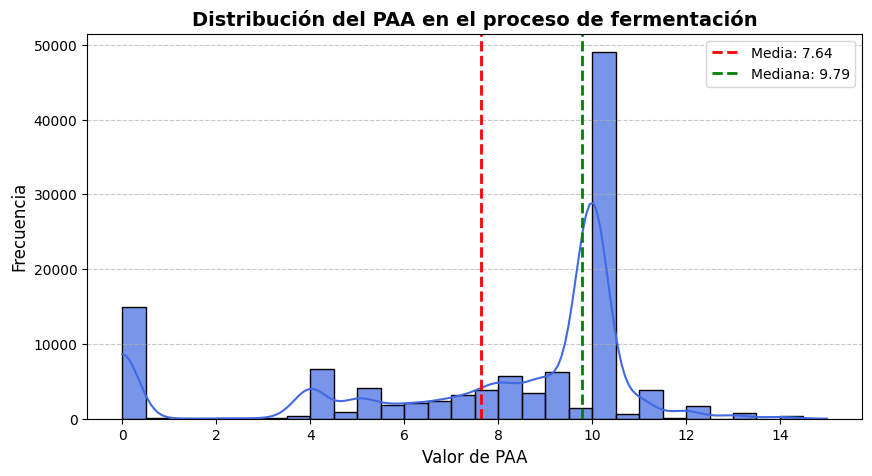

In [9]:
plt.figure(figsize=(10, 5))

# Histograma con mayor personalización
sns.histplot(dataset["PAA flow(Fpaa:PAA flow (L/h))"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Agregar líneas de media y mediana
mean_value = dataset["PAA flow(Fpaa:PAA flow (L/h))"].mean()
median_value = dataset["PAA flow(Fpaa:PAA flow (L/h))"].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')

# Mejorar etiquetas y título
plt.title("Distribución del PAA en el proceso de fermentación", fontsize=14, fontweight="bold")
plt.xlabel("Valor de PAA", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

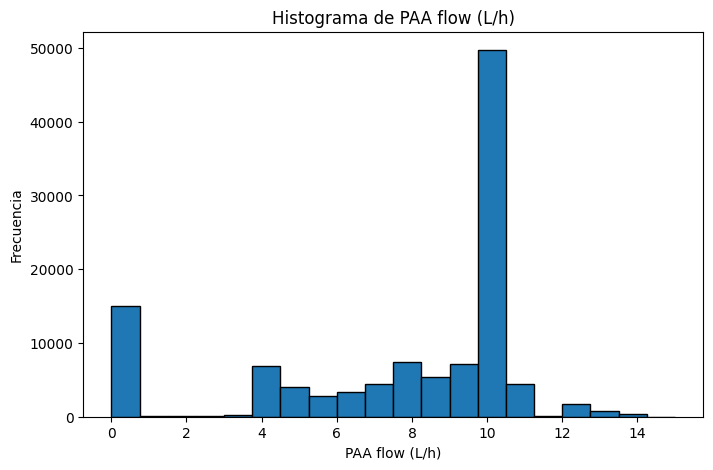

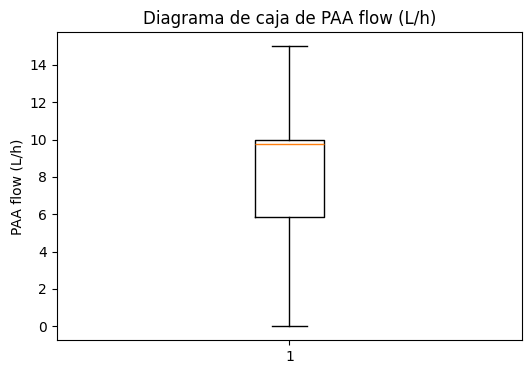

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(dataset["PAA flow(Fpaa:PAA flow (L/h))"], bins=20, edgecolor='black')
plt.xlabel("PAA flow (L/h)")
plt.ylabel("Frecuencia")
plt.title("Histograma de PAA flow (L/h)")
plt.show()

# Visualización: Diagrama de caja (boxplot)
plt.figure(figsize=(6, 4))
plt.boxplot(dataset["PAA flow(Fpaa:PAA flow (L/h))"].dropna())
plt.ylabel("PAA flow (L/h)")
plt.title("Diagrama de caja de PAA flow (L/h)")
plt.show()

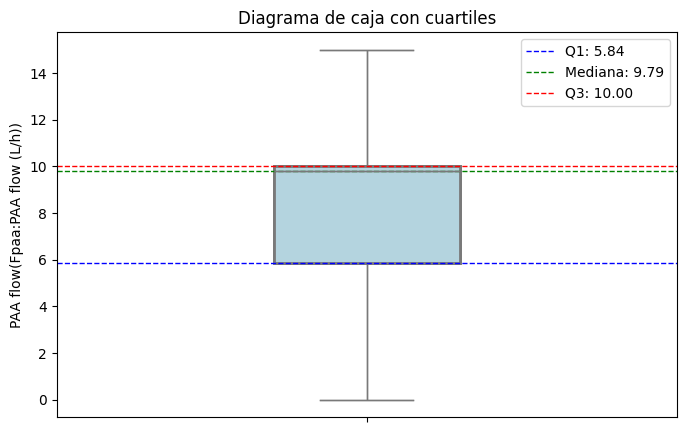

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=dataset["PAA flow(Fpaa:PAA flow (L/h))"], color="lightblue", width=0.3, boxprops=dict(linewidth=2.0))

# Añadir líneas de cuartiles
# Calcular cuartiles de la variable
q1 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].quantile(0.25)
q2 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].median()
q3 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].quantile(0.75)

sns.boxplot(y=dataset["PAA flow(Fpaa:PAA flow (L/h))"], color="lightblue", width=0.3, boxprops=dict(linewidth=2.0))

# Añadir líneas de cuartiles
plt.axhline(y=q1, color='blue', linestyle='dashed', linewidth=1, label=f'Q1: {q1:.2f}')
plt.axhline(y=q2, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {q2:.2f}')
plt.axhline(y=q3, color='red', linestyle='dashed', linewidth=1, label=f'Q3: {q3:.2f}')
plt.legend()
plt.title("Diagrama de caja con cuartiles")
plt.show()


In [12]:
# Análisis descriptivo
descripcion = dataset["PAA flow(Fpaa:PAA flow (L/h))"].describe()
print("Resumen descriptivo:")
print(descripcion)

Resumen descriptivo:
count    113935.000000
mean          7.642712
std           3.560204
min           0.000000
25%           5.844400
50%           9.791200
75%          10.000000
max          15.000000
Name: PAA flow(Fpaa:PAA flow (L/h)), dtype: float64


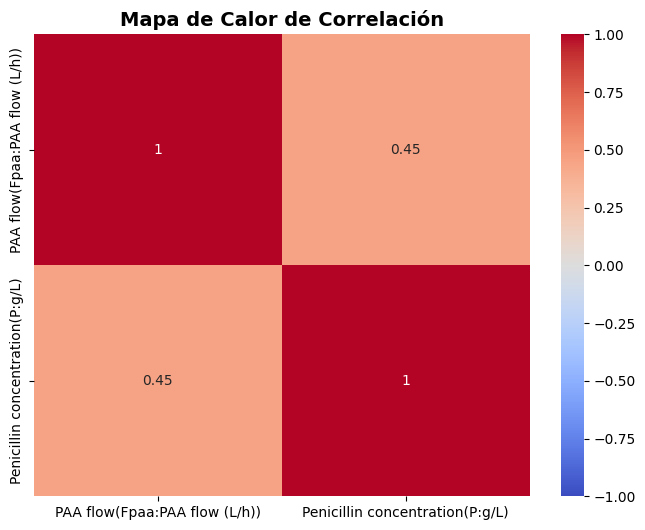

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[["PAA flow(Fpaa:PAA flow (L/h))", "Penicillin concentration(P:g/L)"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Mapa de Calor de Correlación", fontsize=14, fontweight="bold")
plt.show()

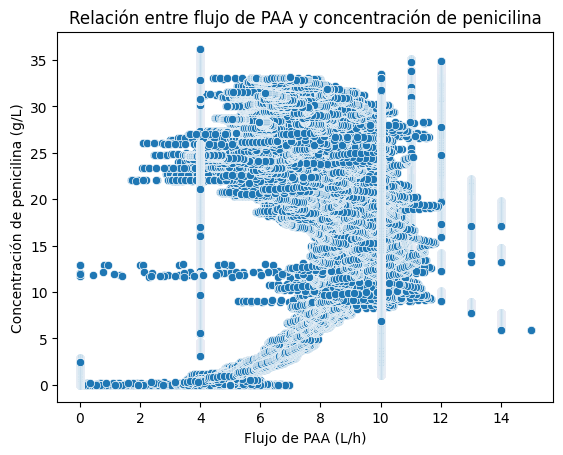

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dataset,
    x="PAA flow(Fpaa:PAA flow (L/h))",
    y="Penicillin concentration(P:g/L)"
)
plt.title("Relación entre flujo de PAA y concentración de penicilina")
plt.xlabel("Flujo de PAA (L/h)")
plt.ylabel("Concentración de penicilina (g/L)")
plt.show()

### Analisis univariado de la Temperatura

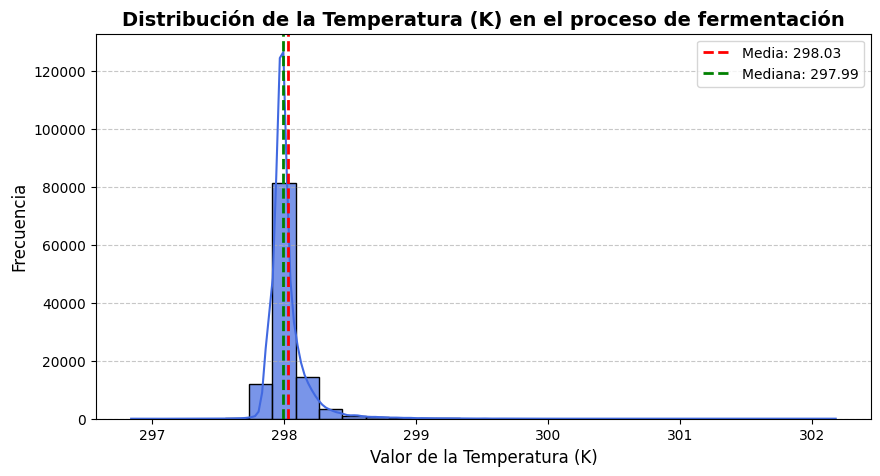

In [15]:
plt.figure(figsize=(10, 5))

# Histograma con mayor personalización
sns.histplot(dataset["Temperature(T:K)"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Agregar líneas de media y mediana
mean_value = dataset["Temperature(T:K)"].mean()
median_value = dataset["Temperature(T:K)"].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')

# Mejorar etiquetas y título
plt.title("Distribución de la Temperatura (K) en el proceso de fermentación", fontsize=14, fontweight="bold")
plt.xlabel("Valor de la Temperatura (K)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

La distribución es asimétrica hacia la derecha, ya que hay una concentración muy alta de valores cerca de 298 K, pero algunos datos se extienden más allá de 300 K.

la temperatura se mantiene bastante estable en torno a 298 K, con algunos valores más altos ocasionales.


Media = 298.03 K (Línea roja discontinua)
Mediana = 297.99 K (Línea verde discontinua)

Interpretación:
- La media y la mediana están muy cercanas, lo que indica que la distribución es casi simétrica y no está fuertemente sesgada.
- Si hubiera una diferencia mayor entre ambas, indicaría una asimetría más pronunciada en los datos.

La mayor parte de los datos están agrupados entre 297.5 K y 298.5 K, lo que indica que la temperatura es bastante estable durante el proceso de fermentación.

Hay algunos valores más altos, que pueden ser outliers (valores atípicos), pero la mayoría de los datos se mantiene en un rango estrecho.

In [16]:
dataset["Temperature(T:K)"].describe()

count    113935.000000
mean        298.026489
std           0.197513
min         296.840000
25%         297.950000
50%         297.990000
75%         298.040000
max         302.180000
Name: Temperature(T:K), dtype: float64

- 113,935 registros → Esto indica que la base de datos tiene una gran cantidad de observaciones de temperatura
- 298.03 K → Temperatura promedio en el proceso de fermentación.
    Indica que el proceso suele mantenerse en torno a este valor, con algunas fluctuaciones.

Mínimo: 296.84 K
Máximo: 302.18 K

Interpretación del mínimo y máximo:
- La mayor parte del tiempo, la temperatura está cerca de 298 K, pero hubo algunas lecturas tan bajas como 296.84 K y tan altas como 302.18 K.


**Cuartiles (`25%`, `50%` - Mediana, `75%`)**
| Percentil  | Temperatura (K) | Interpretación |
|------------|----------------|---------------|
| **Q1 (25%)** | 297.95 | El 25% de las observaciones tiene una temperatura **inferior a este valor**. |
| **Q2 (50%) - Mediana** | 297.99 | **La mitad de los valores está por debajo de este punto**. |
| **Q3 (75%)** | 298.04 | El 75% de las observaciones tiene una temperatura **menor a este valor**. |

**Interpretación:**  
- **La mediana y la media son casi iguales** (**297.99 ≈ 298.03**), lo que indica que la distribución es **simétrica y estable**.  
- **El rango entre Q1 y Q3 es muy pequeño**, lo que confirma **baja variabilidad** en la temperatura.


### Analisis univariado de la Concentración de Penicilina

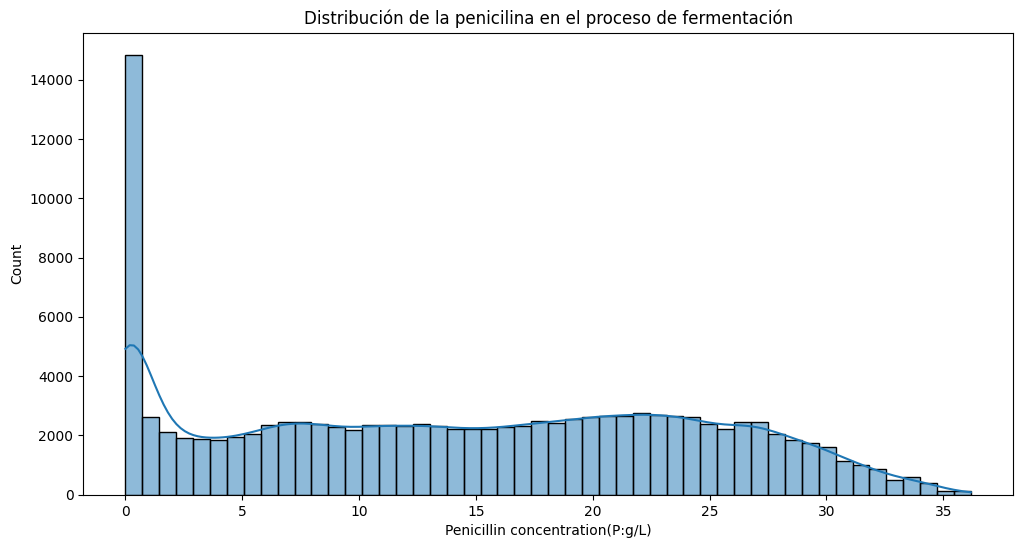

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset["Penicillin concentration(P:g/L)"], bins=50, kde=True)
plt.title("Distribución de la penicilina en el proceso de fermentación")
plt.show()


In [18]:
dataset["Penicillin concentration(P:g/L)"].describe()

count    1.139350e+05
mean     1.433395e+01
std      9.932453e+00
min      3.694700e-26
25%      5.531250e+00
50%      1.438000e+01
75%      2.268750e+01
max      3.618300e+01
Name: Penicillin concentration(P:g/L), dtype: float64

In [19]:
print(dataset.columns)


Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)',
       ...
       '210', '209', '208', '207', '206', '205', '204', '203', '202', '201'],
      dtype='object', length=2239)


### Analisis bivariado ph y penicilina

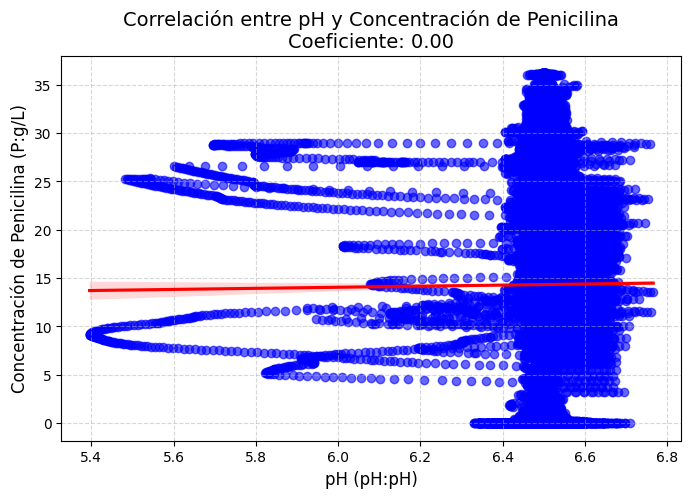

,pH(pH:pH),Penicillin concentration(P:g/L)
pH(pH:pH),1.000000,0.003703
Penicillin concentration(P:g/L),0.003703,1.000000


In [20]:
# Estadísticas descriptivas de la concentración de penicilina
dataset["Penicillin concentration(P:g/L)"].describe()

# Calcular la correlación entre pH y concentración de penicilina
correlation = dataset[["pH(pH:pH)", "Penicillin concentration(P:g/L)"]].corr()

# Graficar un scatter plot con la línea de regresión
plt.figure(figsize=(8, 5))
sns.regplot(x=dataset["pH(pH:pH)"], y=dataset["Penicillin concentration(P:g/L)"], 
            scatter_kws={'color': 'blue', 'alpha': 0.6}, 
            line_kws={'color': 'red'})

plt.title(f"Correlación entre pH y Concentración de Penicilina\nCoeficiente: {correlation.iloc[0,1]:.2f}", fontsize=14)
plt.xlabel("pH (pH:pH)", fontsize=12)
plt.ylabel("Concentración de Penicilina (P:g/L)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Mostrar la matriz de correlación
correlation


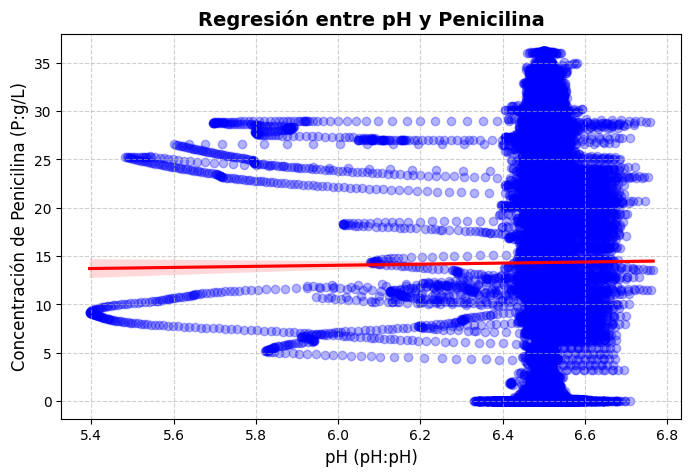

In [21]:
plt.figure(figsize=(8, 5))
sns.regplot(x=dataset["pH(pH:pH)"], 
            y=dataset["Penicillin concentration(P:g/L)"], 
            scatter_kws={'alpha':0.3, 'color':'blue'}, 
            line_kws={'color':'red'})

plt.title("Regresión entre pH y Penicilina", fontsize=14, fontweight="bold")
plt.xlabel("pH (pH:pH)", fontsize=12)
plt.ylabel("Concentración de Penicilina (P:g/L)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


C:\Users\mavel\AppData\Local\Temp\ipykernel_25612\2216593600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(dataset["pH(pH:pH)"], bins=10),


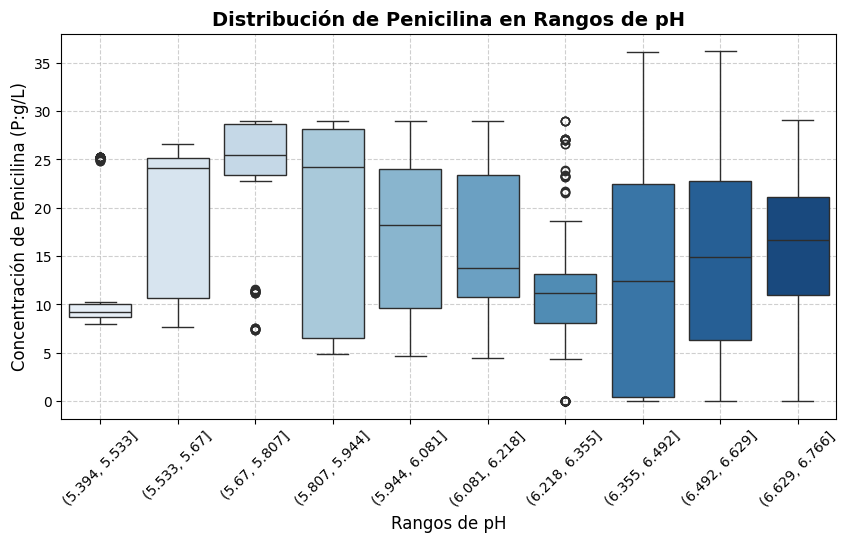

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.cut(dataset["pH(pH:pH)"], bins=10), 
            y=dataset["Penicillin concentration(P:g/L)"], 
            palette="Blues")

plt.title("Distribución de Penicilina en Rangos de pH", fontsize=14, fontweight="bold")
plt.xlabel("Rangos de pH", fontsize=12)
plt.ylabel("Concentración de Penicilina (P:g/L)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


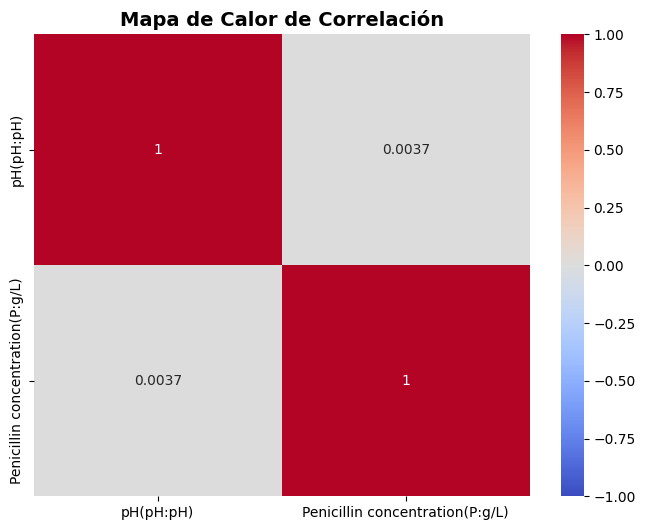

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[["pH(pH:pH)", "Penicillin concentration(P:g/L)"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Mapa de Calor de Correlación", fontsize=14, fontweight="bold")
plt.show()


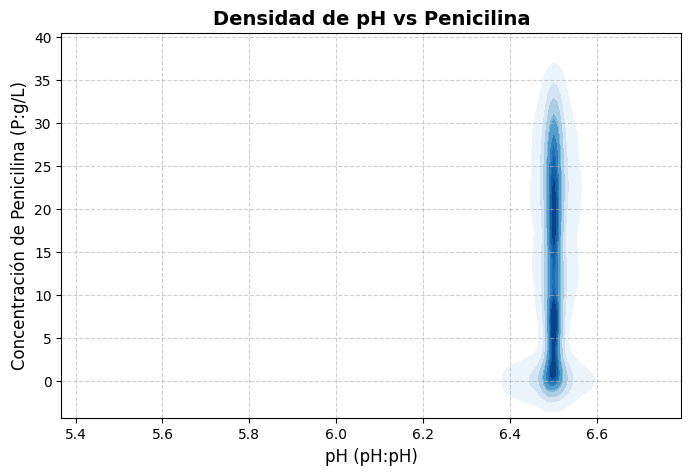

In [24]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=dataset["pH(pH:pH)"], 
            y=dataset["Penicillin concentration(P:g/L)"], 
            cmap="Blues", fill=True)

plt.title("Densidad de pH vs Penicilina", fontsize=14, fontweight="bold")
plt.xlabel("pH (pH:pH)", fontsize=12)
plt.ylabel("Concentración de Penicilina (P:g/L)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


**Interpretación del Gráfico de Densidad (KDE) entre pH y Concentración de Penicilina**  

Este gráfico representa la **distribución conjunta** entre **pH (eje X) y la concentración de penicilina (eje Y)** usando un **mapa de densidad** (KDE - Kernel Density Estimation).

---

🔹 **1. Concentración de los Datos**
- **Casi todos los datos están concentrados en un rango estrecho de pH (~6.4 - 6.6).**
- Esto sugiere que el **pH se mantiene constante** en el proceso de fermentación, sin grandes variaciones.
- **No hay datos dispersos en otros valores de pH (por debajo de 6.2 o por encima de 6.6).**

---

🔹 **2. Relación con la Penicilina**
- **La mayor densidad de puntos se encuentra alrededor de un único valor de pH (6.4 - 6.6).**  
- **Las concentraciones de penicilina varían más** en ese rango, lo que indica que el pH no es un factor determinante en la variabilidad de la penicilina.  
- No se observa **una relación clara** entre pH y concentración de penicilina, ya que la variabilidad de la penicilina ocurre en un solo rango de pH.

---

🔹 **3. Detección de Patrones**
- **Si hubiera una relación fuerte**, se esperaría que la densidad de puntos estuviera inclinada hacia arriba o hacia un lado.
- Sin embargo, aquí vemos **una acumulación vertical**, lo que indica que el pH se mantiene fijo mientras la concentración de penicilina cambia.
- Esto confirma que **el pH no tiene una correlación fuerte con la concentración de penicilina**.

---

 **Conclusión**
- **El pH se mantiene en un rango estable (~6.4 - 6.6).**  
- **La variabilidad en la concentración de penicilina no depende del pH, ya que ocurre en un único rango de pH.**  
- **No hay una relación visible entre pH y penicilina**, lo que concuerda con el análisis de correlación previa (~0.0037).  



### Analisis bivariado con el tiempo

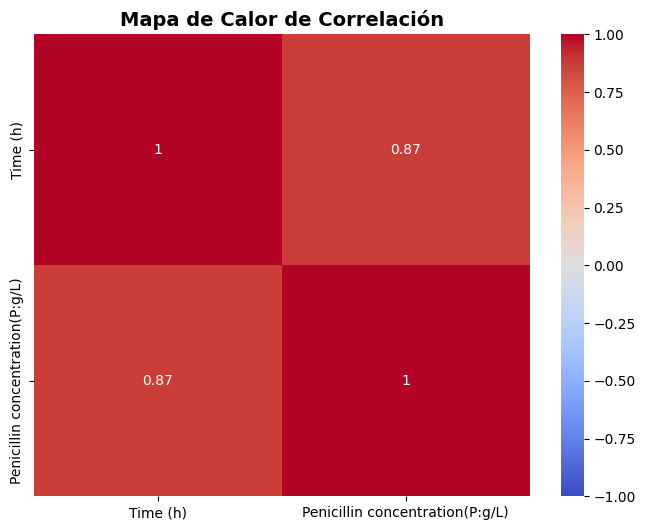

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[["Time (h)", "Penicillin concentration(P:g/L)"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Mapa de Calor de Correlación", fontsize=14, fontweight="bold")
plt.show()

In [ ]:
# Seleccionar las variables de interés
variables = ["Time (h)", "Penicillin concentration(P:g/L)"]
df_selected = df[variables]

# Calcular la correlación entre las variables
correlation = df_selected.corr().iloc[0, 1]
print(f"Correlación entre Time (h) y Penicillin concentration (P:g/L): {correlation:.4f}")

# Crear una tabla de contingencia categorizando los tiempos en cuartiles
df_selected["Time_bins"] = pd.qcut(df_selected["Time (h)"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
contingency_table = pd.crosstab(df_selected["Time_bins"], df_selected["Penicillin concentration(P:g/L)"].apply(lambda x: "Alta" if x >= df_selected["Penicillin concentration(P:g/L)"].median() else "Baja"))
print("\nTabla de contingencia:")
print(contingency_table)


Correlación entre Time (h) y Penicillin concentration (P:g/L): 0.8702


C:\Users\mavel\AppData\Local\Temp\ipykernel_25612\482830737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Time_bins"] = pd.qcut(df_selected["Time (h)"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])



Tabla de contingencia:
Penicillin concentration(P:g/L)   Alta   Baja
Time_bins                                    
Q1                                   0  28500
Q2                                6104  22396
Q3                               26451   2029
Q4                               24414   4041


C:\Users\mavel\AppData\Local\Temp\ipykernel_25612\3702136151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(dataset["Time (h)"], bins=10),


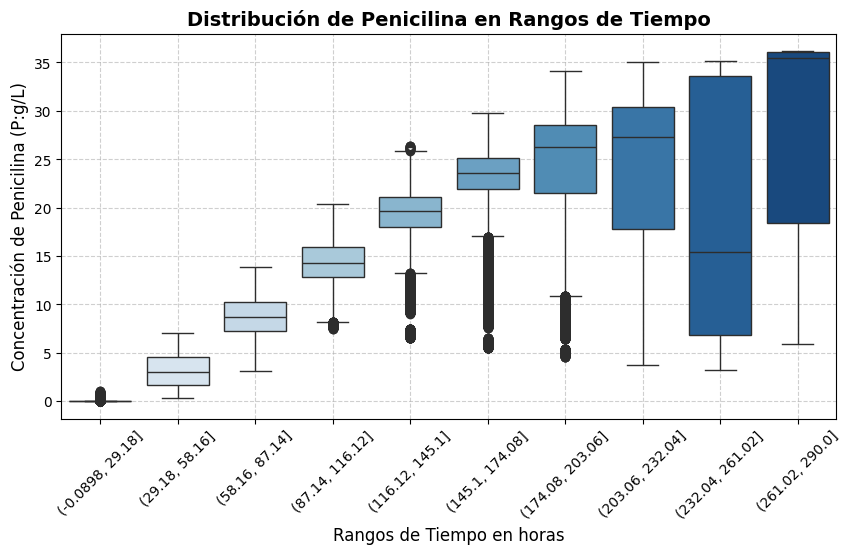

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.cut(dataset["Time (h)"], bins=10), 
            y=dataset["Penicillin concentration(P:g/L)"], 
            palette="Blues")

plt.title("Distribución de Penicilina en Rangos de Tiempo", fontsize=14, fontweight="bold")
plt.xlabel("Rangos de Tiempo en horas", fontsize=12)
plt.ylabel("Concentración de Penicilina (P:g/L)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


### Analisis bivairiado con la temperatura y penicilina

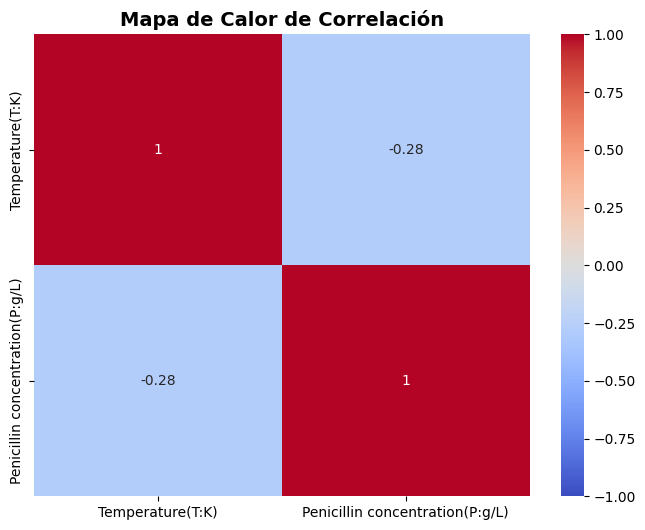

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[["Temperature(T:K)", "Penicillin concentration(P:g/L)"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Mapa de Calor de Correlación", fontsize=14, fontweight="bold")
plt.show()

In [28]:
print(f"El dataset tiene {dataset.shape[1]} columnas.")
print("Nombres de las columnas:")
print(dataset.columns.tolist())  # Ver nombres de columnas


El dataset tiene 2239 columnas.
Nombres de las columnas:
['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_

In [29]:
num_cols = min(33, dataset.shape[1])  # Asegurar que no seleccionemos más columnas de las disponibles
df = dataset.iloc[:, :num_cols]

print(f"Se han seleccionado {num_cols} columnas para EDA.")
print(df.head())  # Mostrar las primeras filas


Se han seleccionado 33 columnas para EDA.
   Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335 

### Validar valores nulos

In [30]:


def validar_nulos(df):
    """
    Función para validar la cantidad de valores nulos en cada columna de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): DataFrame a analizar.

    Retorna:
    pd.DataFrame: DataFrame con el número y porcentaje de valores nulos por columna.
    """
    # Contar valores nulos por columna
    nulos = df.isnull().sum()

    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (nulos / len(df)) * 100

    # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({'Valores Nulos': nulos, 'Porcentaje (%)': porcentaje_nulos})

    # Filtrar solo columnas con valores nulos
    resultado = resultado[resultado['Valores Nulos'] > 0].sort_values(by="Valores Nulos", ascending=False)

    if resultado.empty:
        print(" No hay valores nulos en el DataFrame.")
    else:
        print(" Columnas con valores nulos:")
        print(resultado)

    return resultado


In [31]:
resultado_nulos = validar_nulos(df)

 Columnas con valores nulos:
                                                    Valores Nulos  \
PAA concentration offline(PAA_offline:PAA (g L^...         111873   
NH_3 concentration off-line(NH3_offline:NH3 (g ...         111873   
Offline Penicillin concentration(P_offline:P(g ...         111873   
Offline Biomass concentratio(X_offline:X(g L^{-...         111873   
Viscosity(Viscosity_offline:centPoise)                     111873   

                                                    Porcentaje (%)  
PAA concentration offline(PAA_offline:PAA (g L^...       98.190196  
NH_3 concentration off-line(NH3_offline:NH3 (g ...       98.190196  
Offline Penicillin concentration(P_offline:P(g ...       98.190196  
Offline Biomass concentratio(X_offline:X(g L^{-...       98.190196  
Viscosity(Viscosity_offline:centPoise)                   98.190196  



 **Interpretación**
- **`Valores Nulos`**: Número total de valores nulos en cada columna.
- **`Porcentaje (%)`**: Proporción de valores nulos respecto al total de filas del dataset.

En este caso:
- Las columnas como **`PAA concentration offline`, `NH_3 concentration off-line`, `Offline Penicillin concentration`**, etc., **tienen 111,873 valores nulos**.
- Esto representa **el 98.19%** de los datos en esas columnas, lo cual es extremadamente alto.

**¿Qué significa esto?**
- **Posibles causas**:
  1. **Datos faltantes en la recopilación**: Estas mediciones pueden haber sido omitidas en varias simulaciones.
  2. **Errores en el dataset**: Puede que el dataset no tenga bien registradas estas mediciones.
  3. **No aplicable en todas las observaciones**: Algunas variables pueden ser medidas solo en ciertos lotes.


### Valores únicos por variables

In [32]:


# Crear un DataFrame con los valores únicos por variable
unique_values = pd.DataFrame({'Variable': df.columns, 'Valores Únicos': [df[col].nunique() for col in df.columns]})

# Ordenar de mayor a menor cantidad de valores únicos
unique_values = unique_values.sort_values(by="Valores Únicos", ascending=False)

# Mostrar el DataFrame
print(unique_values)




                                             Variable  Valores Únicos
6             Heating/cooling water flow rate(Fc:L/h)           77380
5                              Base flow rate(Fb:L/h)           67206
11                     Substrate concentration(S:g/L)           64531
13                    Penicillin concentration(P:g/L)           56258
7                     Heating water flow rate(Fh:L/h)           54534
18                               Generated heat(Q:kJ)           51059
24               Oxygen Uptake Rate(OUR:(g min^{-1}))           35065
28                     Carbon evolution rate(CER:g/h)           35059
15                               Vessel Weight(Wt:Kg)           31711
19     carbon dioxide percent in off-gas(CO2outgas:%)           28416
14                                 Vessel Volume(V:L)           28296
20                      PAA flow(Fpaa:PAA flow (L/h))           22931
12           Dissolved oxygen concentration(DO2:mg/L)           11087
16                  

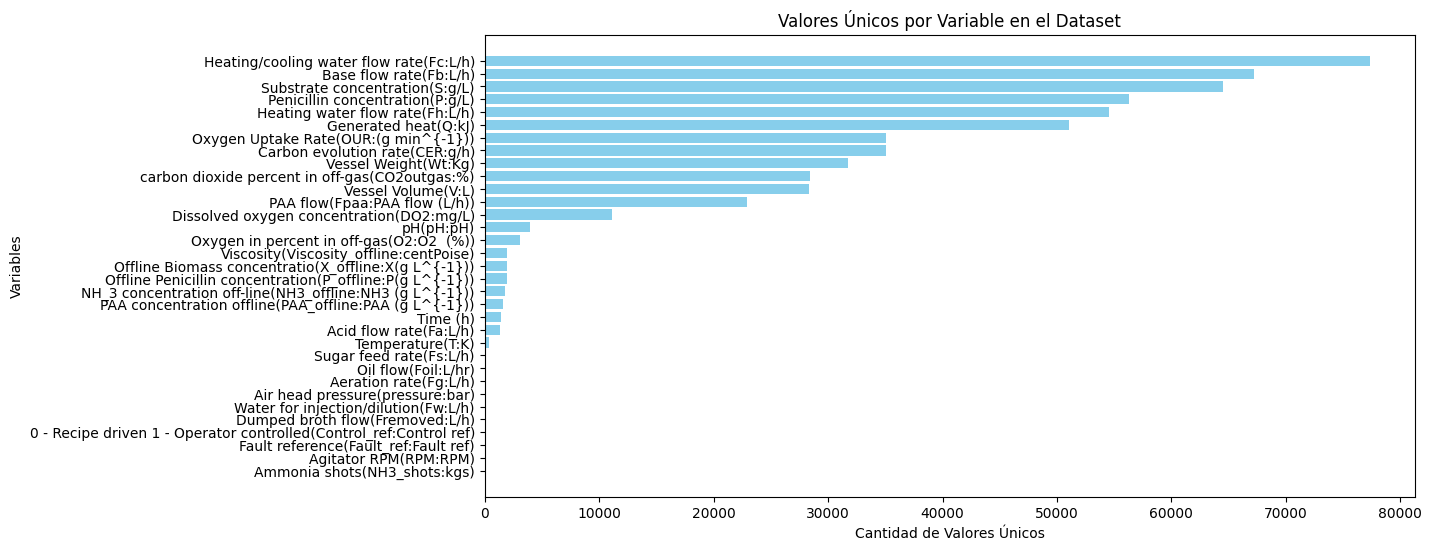

In [33]:
import matplotlib.pyplot as plt

# Configurar tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar valores únicos por columna
plt.barh(unique_values["Variable"], unique_values["Valores Únicos"], color="skyblue")
plt.xlabel("Cantidad de Valores Únicos")
plt.ylabel("Variables")
plt.title("Valores Únicos por Variable en el Dataset")
plt.gca().invert_yaxis()  # Invertir el eje para mejor visualización
plt.show()


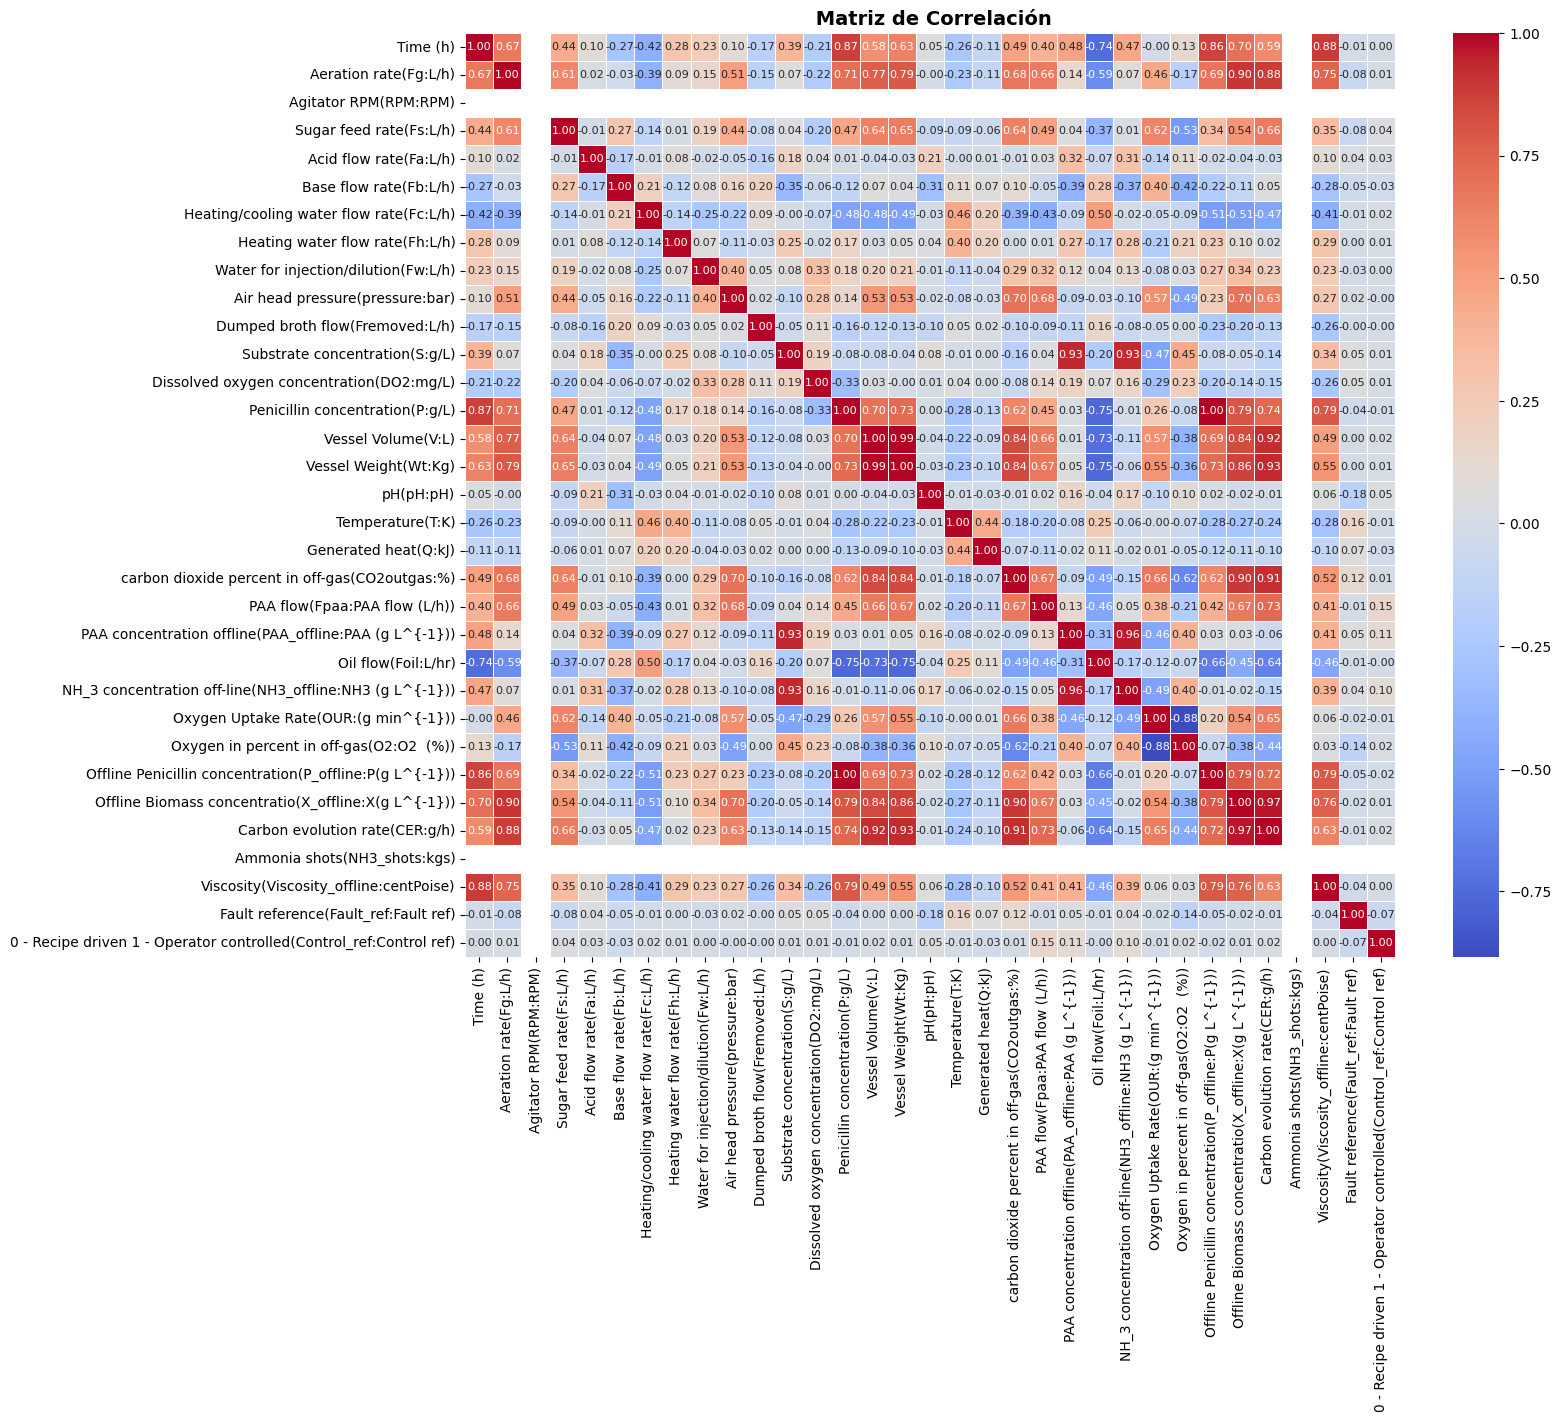

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar una figura más grande y mejorar la visualización
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

# Ajustar las etiquetas para mejor visualización
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Agregar título
plt.title(" Matriz de Correlación", fontsize=14, fontweight="bold")

# Mostrar el gráfico
plt.show()

In [35]:
# calcular la matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)

                                                    Time (h)  \
Time (h)                                            1.000000   
Aeration rate(Fg:L/h)                               0.674398   
Agitator RPM(RPM:RPM)                                    NaN   
Sugar feed rate(Fs:L/h)                             0.439986   
Acid flow rate(Fa:L/h)                              0.098927   
Base flow rate(Fb:L/h)                             -0.270297   
Heating/cooling water flow rate(Fc:L/h)            -0.416910   
Heating water flow rate(Fh:L/h)                     0.282468   
Water for injection/dilution(Fw:L/h)                0.230737   
Air head pressure(pressure:bar)                     0.099895   
Dumped broth flow(Fremoved:L/h)                    -0.167832   
Substrate concentration(S:g/L)                      0.387363   
Dissolved oxygen concentration(DO2:mg/L)           -0.205547   
Penicillin concentration(P:g/L)                     0.870176   
Vessel Volume(V:L)                      

### Identificar lotes iniciales y finales 

In [36]:


def find_batch_start_indices(df, time_value=0.2):
    """
    Encuentra los índices donde la columna `Time (h)` es igual a `time_value`.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'Time (h)'.
        time_value (float): Valor de tiempo que indica el inicio de un lote (por defecto 0.2).

    Returns:
        pd.Index: Índices de las filas donde 'Time (h)' == time_value.
    """
    return df[df['Time (h)'] == time_value].index


def find_batch_end_indices(df, time_value=0.2):
    """
    Encuentra los índices de finalización de los lotes.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'Time (h)'.
        time_value (float): Valor de tiempo que indica el inicio de un lote (por defecto 0.2).

    Returns:
        pd.Index: Índices de las filas que representan el final de cada lote.
    """
    batch_start_indices = find_batch_start_indices(df, time_value)

    # Obtener índices inmediatamente anteriores a 0.2 (fin del lote anterior)
    batch_end_indices = batch_start_indices - 1

    # Filtrar valores negativos
    batch_end_indices = batch_end_indices[batch_end_indices >= 0]

    # Agregar el último índice del DataFrame como fin del último lote
    batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))

    return batch_end_indices


# Llamar a las funciones
batch_start_indices = find_batch_start_indices(df)
batch_end_indices = find_batch_end_indices(df)

# Mostrar resultados
print(f" Índices de inicio de los lotes:\n{batch_start_indices}")
print(f"\n Índices de fin de los lotes:\n{batch_end_indices}")


 Índices de inicio de los lotes:
Index([     0,   1130,   2280,   3670,   4820,   5715,   6865,   8025,   9175,
        10435,  11585,  12595,  13745,  14825,  15975,  16880,  18030,  18970,
        20120,  21155,  22305,  23445,  24595,  25915,  27065,  28370,  29520,
        30575,  31725,  33175,  34325,  35575,  36725,  38025,  39175,  40155,
        41305,  42355,  43505,  44680,  45830,  47045,  48195,  49350,  50500,
        51810,  52960,  54100,  55250,  56410,  57560,  58685,  59835,  60800,
        61950,  63070,  64220,  65390,  66540,  67560,  68710,  69915,  71065,
        72215,  73365,  74520,  75670,  76505,  77655,  78780,  79930,  81000,
        82150,  83330,  84480,  85440,  86590,  87615,  88765,  89940,  91090,
        92190,  93340,  94545,  95695,  96695,  97845,  98955, 100105, 101260,
       102410, 103700, 104850, 105900, 107050, 108105, 109255, 110380, 111530,
       112785],
      dtype='int64')

 Índices de fin de los lotes:
Index([  1129,   2279,   3669,

In [37]:
# Verificar si hay índices de fin de lote válidos
if not batch_end_indices.empty:
    # Extraer los resultados en los índices finales de cada lote
    results_df = df.iloc[batch_end_indices].copy()
    
    # Reiniciar el índice para facilitar la lectura
    results_df.reset_index(drop=True, inplace=True)
    
    # Mostrar los resultados
    print(" Resultados extraídos correctamente:")
    display(results_df)
else:
    print(" No se encontraron índices de fin de lote válidos.")


 Resultados extraídos correctamente:


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
0,226.0,65,100,80,0.000,200.3000,42.8750,1.2727,250,0.9,...,2023.4,1.27630,0.19061,29.3860,23.860,1.46690,0,74.573,0,0
1,230.0,65,100,80,0.000,44.1360,1.8578,0.0001,250,0.9,...,2073.2,1.03340,0.19321,30.3920,20.873,1.25930,0,61.530,0,0
2,278.0,60,100,80,0.000,24.4660,63.6390,444.2800,100,0.9,...,3476.8,0.55138,0.19809,17.5030,18.012,0.73368,0,75.530,0,0
3,230.0,65,100,80,0.000,15.7810,75.7280,1.6785,250,0.9,...,3350.1,0.26071,0.20055,15.1890,17.502,0.97370,0,59.638,0,0
4,179.0,75,100,80,0.000,63.6400,111.6700,14.9050,150,0.9,...,1818.6,1.37300,0.19166,28.0380,24.669,1.54670,0,77.112,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,230.0,65,100,80,0.000,14.7720,73.4010,10.5370,250,0.9,...,2950.6,0.54856,0.19773,21.2200,20.482,1.11860,0,67.908,0,0
96,225.0,65,100,80,0.000,6.5491,57.7560,1.1040,250,0.9,...,3176.7,0.69632,0.19636,17.0520,20.729,1.15890,0,72.165,0,0
97,230.0,65,100,80,0.000,60.4400,70.9450,11.0470,250,0.9,...,1962.0,0.89484,0.19443,32.8080,21.664,1.24770,0,66.590,0,0
98,251.0,60,100,80,1.037,0.0000,281.7100,6.7026,0,0.9,...,4028.5,0.30526,0.20057,5.4819,13.774,0.66308,0,90.729,0,0


In [38]:
resultado_nulos = validar_nulos(results_df)

 No hay valores nulos en el DataFrame.


In [39]:
#estadisticas descriptivas
results_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),100.0,227.870000,1.815069e+01,167.000000,227.500000,230.000000,230.000000,290.00000
Aeration rate(Fg:L/h),100.0,65.350000,3.198406e+00,60.000000,65.000000,65.000000,65.000000,75.00000
Agitator RPM(RPM:RPM),100.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),100.0,81.800000,1.957271e+01,20.000000,80.000000,80.000000,80.000000,150.00000
Acid flow rate(Fa:L/h),100.0,0.155721,6.618278e-01,0.000000,0.000000,0.000000,0.000000,4.15080
Base flow rate(Fb:L/h),100.0,37.788269,3.775116e+01,0.000000,9.951425,29.927000,54.146750,200.30000
Heating/cooling water flow rate(Fc:L/h),100.0,47.035829,4.475456e+01,0.000100,14.768500,32.771500,68.589250,281.71000
Heating water flow rate(Fh:L/h),100.0,42.467140,6.897390e+01,0.000100,1.612250,9.296450,67.956750,444.28000
Water for injection/dilution(Fw:L/h),100.0,224.000000,7.159087e+01,0.000000,250.000000,250.000000,250.000000,400.00000
Air head pressure(pressure:bar),100.0,0.900000,4.463264e-16,0.900000,0.900000,0.900000,0.900000,0.90000


 **Observación:**  

1. **Tiempo (h):** Los intervalos de tiempo varían de 167 a 290 horas, con un tiempo promedio de aproximadamente 227.87 horas.  

2. **Tasa de aireación (Fg:L/h):** La tasa de aireación varía de 60 a 75 L/h, con una tasa promedio de aproximadamente 65.35 L/h.  

3. **RPM del agitador (RPM:RPM):** El agitador mantiene una velocidad constante de 100 RPM en todos los lotes.  

4. **Tasa de alimentación de azúcar (Fs:L/h):** La tasa de alimentación de azúcar varía de 20 a 150 L/h, con un promedio de aproximadamente 81.80 L/h.  

5. **Tasa de flujo de ácido (Fa:L/h):** El flujo de ácido varía de 0 a 4.15 L/h, con un promedio de aproximadamente 0.16 L/h.  

6. **Tasa de flujo de base (Fb:L/h):** El flujo de base varía de 0 a 200.30 L/h, con un promedio de aproximadamente 37.79 L/h.  

7. **Tasa de flujo de agua de calefacción/enfriamiento (Fc:L/h):** Este flujo varía de 0.0001 a 281.71 L/h, con un promedio de aproximadamente 47.04 L/h.  

8. **Tasa de flujo de agua caliente (Fh:L/h):** El flujo de agua caliente varía de 0.0001 a 444.28 L/h, con un promedio de aproximadamente 42.47 L/h.  

9. **Agua para inyección/dilución (Fw:L/h):** La tasa de agua para inyección/dilución varía de 0 a 400 L/h, con un promedio de 224 L/h.  

10. **Presión del cabezal de aire (presión:bar):** La presión del cabezal de aire es constante en 0.9 bar en todos los lotes.  

11. **Flujo de caldo eliminado (Fremoved:L/h):** El flujo de caldo eliminado varía de -4000 a 0 L/h, con un promedio de -400 L/h.  

12. **Concentración de sustrato (S:g/L):** La concentración de sustrato varía de 0.0011 a 115.27 g/L, con un promedio de aproximadamente 19.39 g/L.  

13. **Concentración de oxígeno disuelto (DO2:mg/L):** Varía de 8.87 a 14.77 mg/L, con un promedio de aproximadamente 12.72 mg/L.  

14. **Concentración de penicilina (P:g/L):** La concentración de penicilina varía de 3.16 a 36.16 g/L, con un promedio de aproximadamente 24.01 g/L.  

15. **Volumen del reactor (V:L):** El volumen del reactor varía de 60,331 a 89,990 litros, con un promedio de aproximadamente 76,053.54 litros.  

16. **Peso del reactor (Wt:Kg):** El peso del reactor varía de 68,469 a 99,491 kg, con un promedio de aproximadamente 84,995.10 kg.  

17. **pH (pH:pH):** Los valores de pH varían de 6.47 a 6.68, con un pH promedio de aproximadamente 6.51.  

18. **Temperatura (T:K):** La temperatura varía de 297.43 a 298.99 K, con un promedio de aproximadamente 297.97 K.  

19. **Calor generado (Q:kJ):** El calor generado varía de 4.03 a 833.80 kJ, con un promedio de aproximadamente 257.78 kJ.  

20. **Porcentaje de dióxido de carbono en el gas residual (CO2outgas:%):** Varía de 0.64% a 2.06%, con un promedio de aproximadamente 1.45%.  

21. **Flujo de PAA (Fpaa:L/h):** El flujo de PAA varía de 3.66 a 15 L/h, con un promedio de aproximadamente 6.58 L/h.  

22. **Concentración de PAA offline (PAA_offline:PAA (g L^{-1})):** La concentración de PAA varía de 393.1 a 11,524 g/L, con un promedio de aproximadamente 3,358.13 g/L.  

23. **Flujo de aceite (Foil:L/hr):** El flujo de aceite es constante en 23 L/hr en todos los lotes.  

24. **Concentración de NH3 offline (NH3_offline:NH3 (g L^{-1})):** Varía de 1,590.6 a 5,170 g/L, con un promedio de aproximadamente 2,571.96 g/L.  

25. **Tasa de absorción de oxígeno (OUR:(g min^{-1})):** Varía de 0.0447 a 1.7044 g/min, con un promedio de aproximadamente 0.94 g/min.  

26. **Porcentaje de oxígeno en el gas residual (O2:O2 (%)):** Varía de 0.1863% a 0.2035%, con un promedio de aproximadamente 0.1942%.  

27. **Concentración de penicilina offline (P_offline:P(g L^{-1})):** Varía de 3.17 a 36.18 g/L, con un promedio de aproximadamente 24.03 g/L.  

28. **Concentración de biomasa offline (X_offline:X(g L^{-1})):** Varía de 10.76 a 25.27 g/L, con un promedio de aproximadamente 20.80 g/L.  

29. **Tasa de evolución de carbono (CER:g/h):** Varía de 0.49 a 1.71 g/h, con un promedio de aproximadamente 1.21 g/h.  

30. **Inyecciones de amoníaco (NH3_shots:kgs):** Las inyecciones de amoníaco son constantes en 0 kg en todos los lotes.  

31. **Viscosidad (Viscosity_offline:centPoise):** Varía de 53.75 a 117.93 centipoise, con un promedio de aproximadamente 71.06 centipoise.  

32. **Referencia de fallos (Fault_ref:Fault ref):** Indica dos valores, 0 y 1, con un promedio de 0.01, lo que sugiere fallos ocasionales.  

33. **Referencia de control (Control_ref:Control ref):** Indica dos valores, 0 y 1, lo que sugiere una combinación de lotes controlados por receta y por operador.  



### Encuentra el lote que contiene la concentración objetivo de penicilina

In [40]:


def find_batch_with_concentration(df, batch_start_indices, batch_end_indices, 
                                  penicillin_col="Offline Penicillin concentration(P_offline:P(g L^{-1}))",
                                  target_concentration=36.18):
    """
    Encuentra el lote que contiene la concentración objetivo de penicilina.

    Args:
        df (pd.DataFrame): DataFrame con los datos de los lotes.
        batch_start_indices (pd.Index): Índices de inicio de cada lote.
        batch_end_indices (pd.Index): Índices de fin de cada lote.
        penicillin_col (str): Nombre de la columna con la concentración de penicilina.
        target_concentration (float): Concentración objetivo de penicilina.

    Returns:
        tuple: (Número del lote encontrado, lista de índices de los lotes)
    """
    # Verificar si las listas de inicio y fin de lotes no están vacías
    if batch_start_indices.empty or batch_end_indices.empty:
        print(" No se encontraron índices válidos de inicio o fin de lotes.")
        return None, []

    # Crear una lista vacía para almacenar los índices de cada lote
    batch_indices = []

    # Inicializar el inicio del primer lote
    batch_start = batch_start_indices[0]

    for batch_end in batch_end_indices:
        # Guardar el rango de índices de cada lote
        batch_indices.append((batch_start, batch_end))
        # Actualizar el inicio del siguiente lote
        batch_start = batch_end + 1

    # Buscar el lote con la concentración objetivo de Penicilina
    target_batch = None

    for batch_number, (start, end) in enumerate(batch_indices, start=1):
        batch_data = df.loc[start:end]  # Seleccionar los datos del lote
        
        # Verificar si la concentración objetivo está en el lote
        if batch_data[penicillin_col].eq(target_concentration).any():
            target_batch = batch_number
            break  # Detener la búsqueda al encontrar el primer lote válido

    return target_batch, batch_indices


# Llamar a la función
batch_number, batch_indices = find_batch_with_concentration(df, batch_start_indices, batch_end_indices)

# Mostrar el resultado
if batch_number:
    print(f" El lote con concentración de penicilina 36.18 g/L es el Lote {batch_number}.")
else:
    print(f" No se encontró ningún lote con concentración de 36.18 g/L.")




 El lote con concentración de penicilina 36.18 g/L es el Lote 29.


### Obtiene los índices de inicio y fin de un lote específico

In [41]:
def get_batch_indices(batch_number, batch_indices):
    """
    Obtiene los índices de inicio y fin de un lote específico.

    Args:
        batch_number (int): Número del lote a buscar.
        batch_indices (list of tuples): Lista de índices de inicio y fin de cada lote.

    Returns:
        tuple: (índice de inicio, índice de fin) si el lote existe; None en caso contrario.
    """
    # Validar que el número del lote está en el rango correcto
    if 1 <= batch_number <= len(batch_indices):
        batch_start, batch_end = batch_indices[batch_number - 1]  # Convertir a índice base 0
        print(f" Lote {batch_number}:")
        print(f"   - Índice de Inicio: {batch_start}")
        print(f"   - Índice de Fin: {batch_end}")
        return batch_start, batch_end
    else:
        print(f" El Lote {batch_number} está fuera de rango.")
        return None

# Ejemplo de uso: Encontrar los índices de inicio y fin del Lote 29
batch_number = 29
batch_29_start, batch_29_end = get_batch_indices(batch_number, batch_indices)


 Lote 29:
   - Índice de Inicio: 31725
   - Índice de Fin: 33174


## Analisis del batch 61 al 90

In [87]:
def get_batch_indices(batch_number, batch_indices):
    """
    Obtiene los índices de inicio y fin de un lote específico.

    Args:
        batch_number (int): Número del lote a buscar.
        batch_indices (list of tuples): Lista de índices de inicio y fin de cada lote.

    Returns:
        tuple: (índice de inicio, índice de fin) si el lote existe; None en caso contrario.
    """
    # Validar que el número del lote está en el rango correcto
    if 1 <= batch_number <= len(batch_indices):
        batch_start, batch_end = batch_indices[batch_number - 1]  # Convertir a índice base 0
        print(f" Lote {batch_number}:")
        print(f"   - Índice de Inicio: {batch_start}")
        print(f"   - Índice de Fin: {batch_end}")
        return batch_start, batch_end
    else:
        print(f" El Lote {batch_number} está fuera de rango.")
        return None

# Ejemplo de uso: Encontrar los índices de inicio y fin del Lote 29
batch_number_61 = 61

batch_61_start, batch_61_end = get_batch_indices(batch_number_61, batch_indices)

 Lote 61:
   - Índice de Inicio: 68710
   - Índice de Fin: 69914


In [88]:
def get_batch_indices(batch_number, batch_indices):
    """
    Obtiene los índices de inicio y fin de un lote específico.

    Args:
        batch_number (int): Número del lote a buscar.
        batch_indices (list of tuples): Lista de índices de inicio y fin de cada lote.

    Returns:
        tuple: (índice de inicio, índice de fin) si el lote existe; None en caso contrario.
    """
    # Validar que el número del lote está en el rango correcto
    if 1 <= batch_number <= len(batch_indices):
        batch_start, batch_end = batch_indices[batch_number - 1]  # Convertir a índice base 0
        print(f" Lote {batch_number}:")
        print(f"   - Índice de Inicio: {batch_start}")
        print(f"   - Índice de Fin: {batch_end}")
        return batch_start, batch_end
    else:
        print(f" El Lote {batch_number} está fuera de rango.")
        return None

# Ejemplo de uso: Encontrar los índices de inicio y fin del Lote 29
batch_numbers_90 = 91
batch_90_start, batch_90_end = get_batch_indices(batch_numbers_90, batch_indices)

 Lote 91:
   - Índice de Inicio: 102410
   - Índice de Fin: 103699


--- Análisis del Lote ---
 Estadísticas Descriptivas del Lote:


,count,mean,std,min,25%,50%,75%,max
Time (h),34990.0,113.536125,66.055191,2.000000e-01,56.600000,113.000000,169.400000,258.00000
Aeration rate(Fg:L/h),34990.0,65.352101,11.575005,3.000000e+01,60.000000,65.000000,75.000000,75.00000
Agitator RPM(RPM:RPM),34990.0,100.000000,0.000000,1.000000e+02,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),34990.0,76.111232,24.285407,2.000000e+00,75.000000,80.000000,90.000000,150.00000
Acid flow rate(Fa:L/h),34990.0,0.023804,0.267971,0.000000e+00,0.000000,0.000000,0.000000,7.79880
Base flow rate(Fb:L/h),34990.0,69.132968,46.447793,0.000000e+00,42.901250,58.321500,79.350750,225.00000
Heating/cooling water flow rate(Fc:L/h),34990.0,67.598715,93.858914,1.000000e-04,10.305250,31.552500,87.763000,1279.30000
Heating water flow rate(Fh:L/h),34990.0,18.970611,42.628913,1.000000e-04,0.000100,0.104025,11.048500,963.28000
Water for injection/dilution(Fw:L/h),34990.0,154.951415,155.911794,0.000000e+00,0.000000,100.000000,250.000000,500.00000
Air head pressure(pressure:bar),34990.0,0.945450,0.134830,6.000000e-01,0.900000,0.900000,1.100000,1.10000


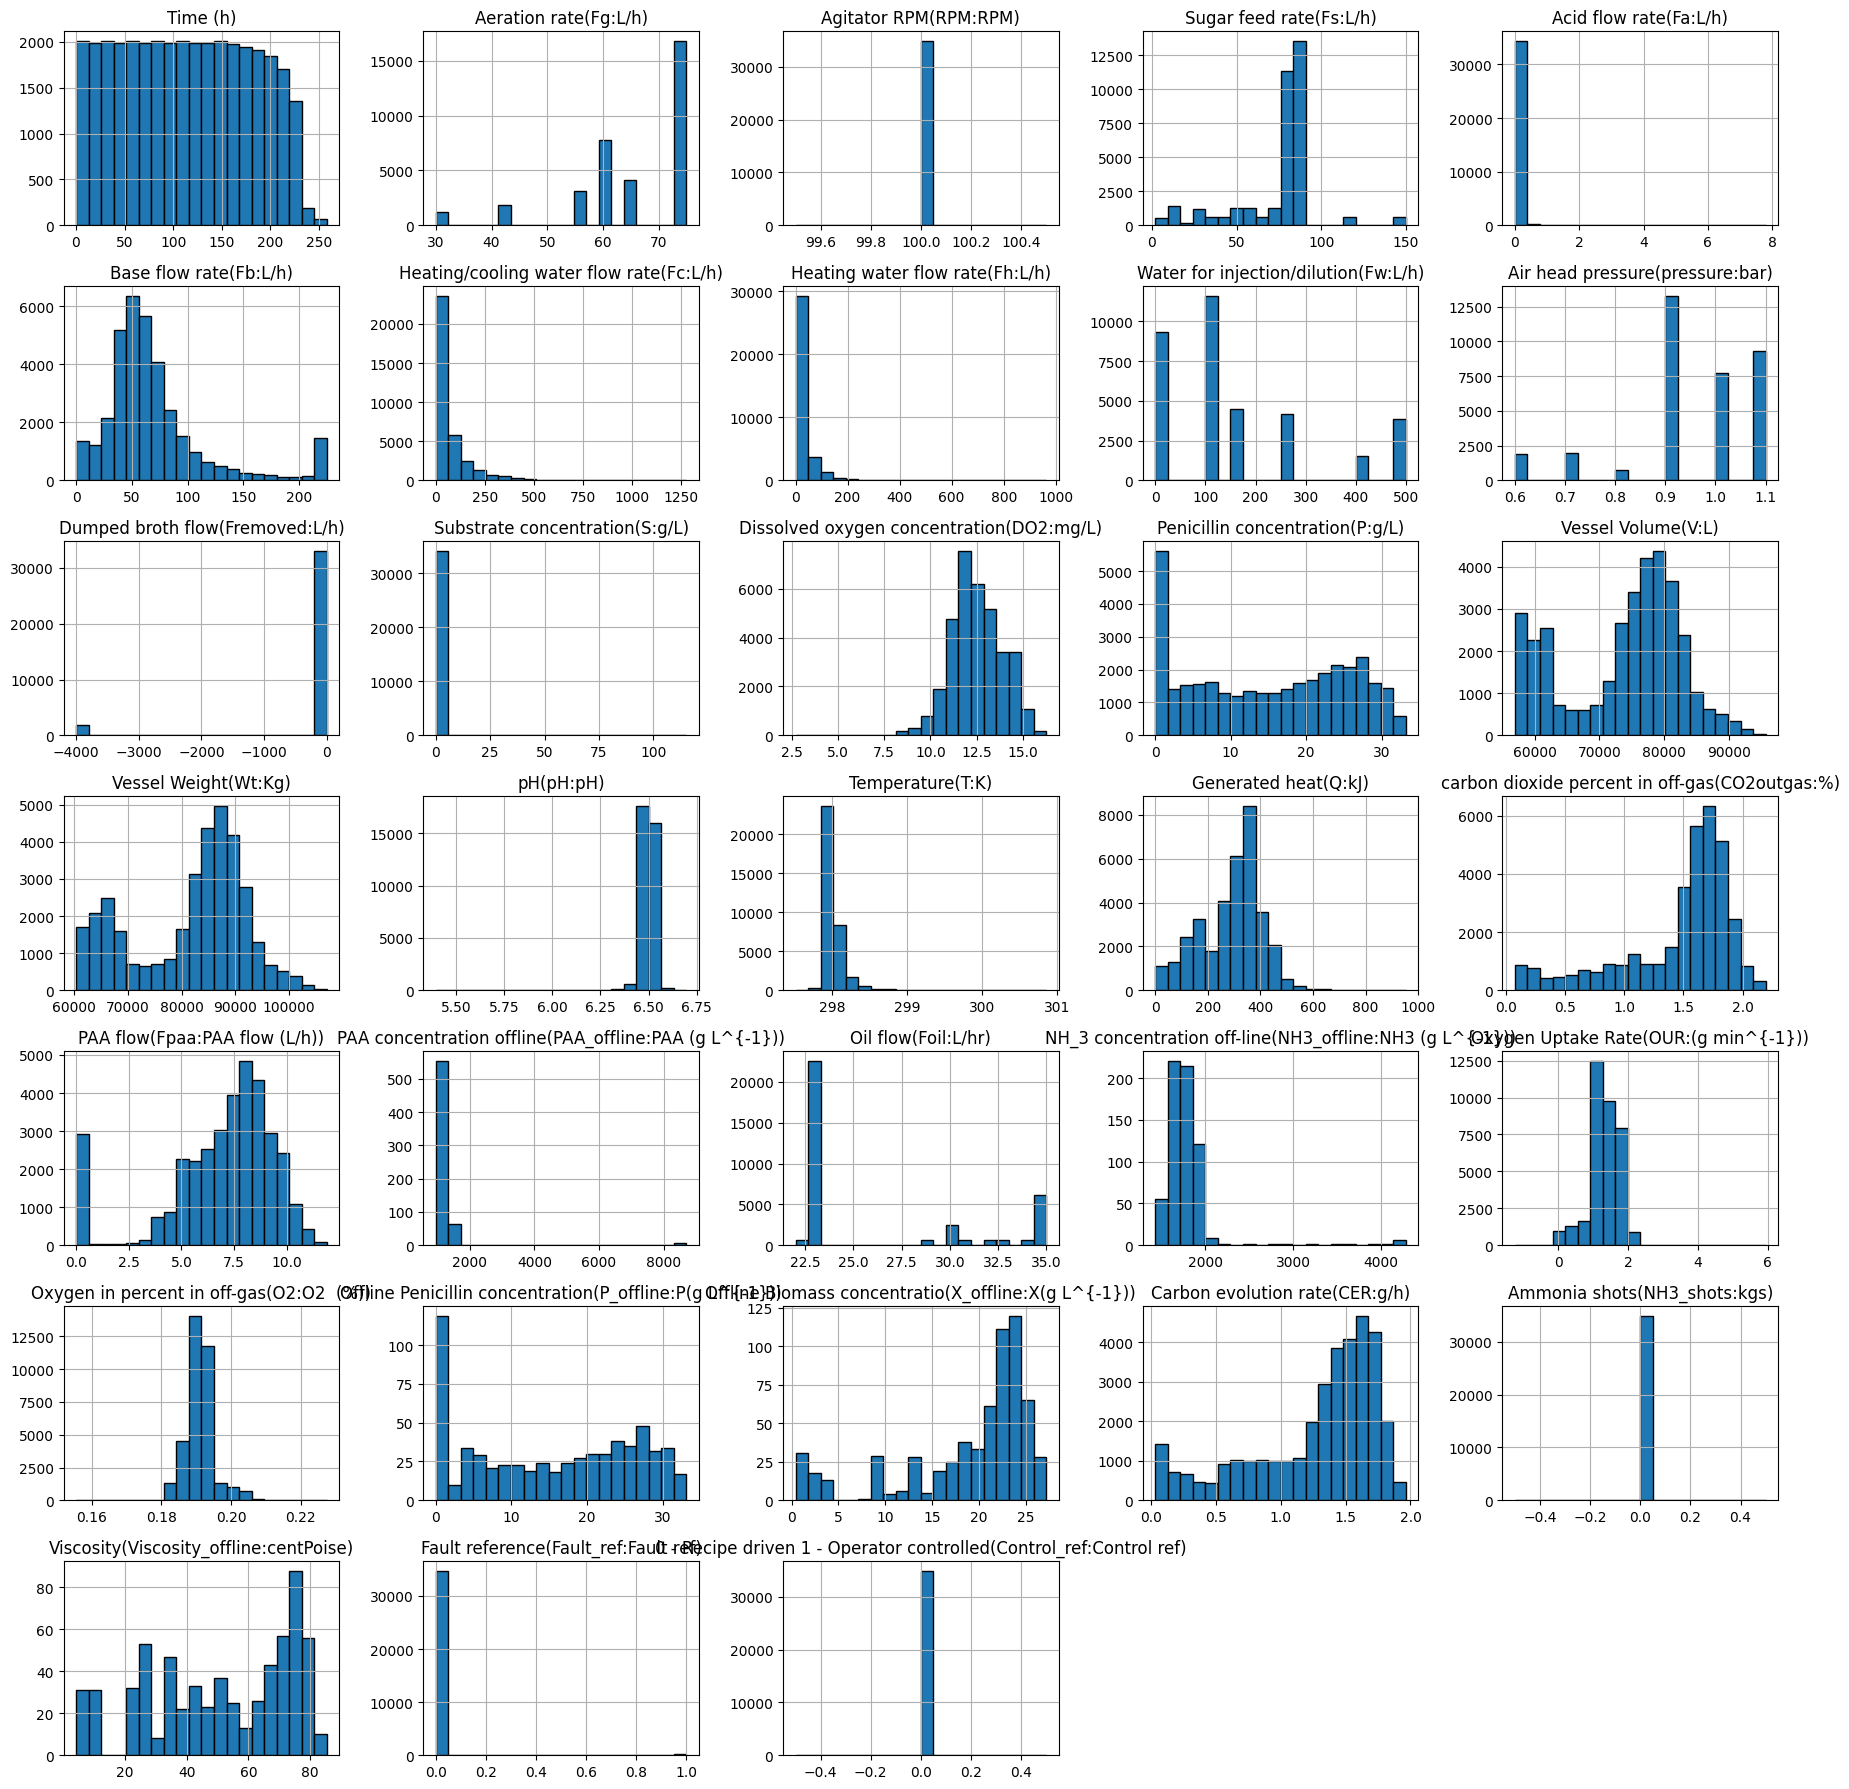

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_batch(df, start_index, end_index, num_rows=7, num_cols=5):
    """
    Extrae los datos de un lote específico, muestra estadísticas, matriz de correlación
    y gráficos de histogramas de todas sus variables.

    Args:
        df (pd.DataFrame): DataFrame principal con los datos de los lotes.
        start_index (int): Índice de inicio del lote.
        end_index (int): Índice de fin del lote.
        num_rows (int): Número de filas para la cuadrícula de histogramas (default 7).
        num_cols (int): Número de columnas para la cuadrícula de histogramas (default 5).
    """
    # Extraer datos del lote
    batch_df = df.loc[start_index:end_index]

    print("--- Análisis del Lote ---")
    # Mostrar estadísticas descriptivas
    print(" Estadísticas Descriptivas del Lote:")
    display(batch_df.describe().T)


    #  Histogramas de todas las variables en el lote
    num_vars = len(batch_df.columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Aplanar el array de subgráficos
    axes = axes.ravel()

    # Crear histogramas de cada variable
    for i, var in enumerate(batch_df.columns):
        ax = axes[i]
        ax.hist(batch_df[var], bins=20, edgecolor='k')
        ax.set_title(var)
        ax.grid(True)

    # Eliminar subgráficos vacíos
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    return batch_df

# 🔹 Extraer, analizar y visualizar el Lote 29 (ajustar índices según dataset)
batch_61_90_df = analyze_batch(df, start_index=batch_61_start, end_index=batch_90_end)

In [91]:
batch_61_90_df.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

In [92]:
batch_61_90_df.shape

(34990, 33)

## Análisis bivariado PAA y Penicilina

### Seleccionar variables y los batch más relevantes

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
 
# =============================================================================
# 1. Selección de variables: Variable objetivo y predictor
# Se seleccionan:
# - Penicillin concentration(P:g/L): Indicador final de rendimiento.
# - PAA flow(Fpaa:PAA flow (L/h)): Variable de control crítica para la dosificación del precursor.
# =============================================================================
target_variable = 'Penicillin concentration(P:g/L)'
predictor = 'PAA flow(Fpaa:PAA flow (L/h))'
 
# Extraer el subconjunto con las dos variables y eliminar valores faltantes
df_biv = batch_61_90_df[[target_variable, predictor]].dropna()
 

### Estadísticas descriptivas y cálculo de correlaciones

In [104]:

# =============================================================================
# 2. Estadísticas descriptivas y cálculo de correlaciones
# =============================================================================
desc_target = df_biv[target_variable].describe()
desc_predictor = df_biv[predictor].describe()
 
print("Estadísticas descriptivas de Penicillin concentration:")
print(desc_target)
print("\nEstadísticas descriptivas de PAA flow:")
print(desc_predictor)
 
# Correlación de Pearson (lineal) y Spearman (monótona)
corr_pearson = df_biv[target_variable].corr(df_biv[predictor], method='pearson')
corr_spearman = df_biv[target_variable].corr(df_biv[predictor], method='spearman')
 
print(f"\nCorrelación de Pearson entre {target_variable} y {predictor}: {corr_pearson:.3f}")
print(f"Correlación de Spearman entre {target_variable} y {predictor}: {corr_spearman:.3f}")
 

Estadísticas descriptivas de Penicillin concentration:
count    3.499000e+04
mean     1.500956e+01
std      1.036009e+01
min      3.694700e-26
25%      5.160875e+00
50%      1.573250e+01
75%      2.446950e+01
max      3.320900e+01
Name: Penicillin concentration(P:g/L), dtype: float64

Estadísticas descriptivas de PAA flow:
count    34990.000000
mean         6.915300
std          2.666898
min          0.000000
25%          5.816325
50%          7.555400
75%          8.677600
max         11.901000
Name: PAA flow(Fpaa:PAA flow (L/h)), dtype: float64

Correlación de Pearson entre Penicillin concentration(P:g/L) y PAA flow(Fpaa:PAA flow (L/h)): 0.406
Correlación de Spearman entre Penicillin concentration(P:g/L) y PAA flow(Fpaa:PAA flow (L/h)): 0.278



**1. Estadísticas descriptivas de la concentración de Penicilina (Penicillin concentration)**  
Esta variable representa la cantidad de penicilina medida en gramos por litro (P:g/L). Las principales estadísticas descriptivas son:

- **count**: 34,990 → Hay un total de 34,990 observaciones en el conjunto de datos.
- **mean**: 15.01 → La concentración promedio de penicilina es 15.01 g/L.
- **std (desviación estándar)**: 10.36 → Indica que la variabilidad de la concentración de penicilina es alta.
- **min**: \(3.6947 \times 10^{-26}\) → Un valor prácticamente cero, lo que sugiere que hay muestras donde la penicilina es casi inexistente.
- **Percentiles**:
  - **25%**: 5.16 → El 25% de las muestras tienen una concentración de penicilina menor o igual a 5.16 g/L.
  - **50% (mediana)**: 15.73 → La mitad de las muestras tienen una concentración inferior a 15.73 g/L y la otra mitad superior.
  - **75%**: 24.47 → El 75% de las muestras tienen una concentración de penicilina menor o igual a 24.47 g/L.
- **max**: 33.21 → La concentración máxima registrada de penicilina es 33.21 g/L.

**Conclusión**: La concentración de penicilina varía ampliamente (de casi 0 hasta 33.21 g/L), con una media de 15.01 g/L y una distribución ligeramente asimétrica.

---

**2. Estadísticas descriptivas del flujo de PAA (PAA flow)**  
Esta variable mide el flujo de ácido peracético (PAA) en litros por hora (L/h). Sus estadísticas clave son:

- **count**: 34,990 → Se tienen 34,990 mediciones del flujo de PAA.
- **mean**: 6.92 → En promedio, el flujo de PAA es de 6.92 L/h.
- **std**: 2.67 → Hay una variabilidad moderada en el flujo de PAA.
- **min**: 0.00 → Indica que en algunas mediciones el flujo de PAA fue nulo.
- **Percentiles**:
  - **25%**: 5.82 → Un 25% de las muestras tienen un flujo de PAA menor o igual a 5.82 L/h.
  - **50% (mediana)**: 7.56 → La mitad de las muestras tienen un flujo inferior a 7.56 L/h.
  - **75%**: 8.68 → El 75% de las muestras tienen un flujo menor o igual a 8.68 L/h.
- **max**: 11.90 → El flujo máximo registrado fue de 11.90 L/h.

 **Conclusión**: El flujo de PAA varía de 0 a 11.90 L/h, con una media de 6.92 L/h y una distribución más acotada que la de la penicilina.

---
**3. Correlaciones entre la concentración de penicilina y el flujo de PAA**  
Se calculan dos tipos de correlaciones:

- **Correlación de Pearson**: **0.406**  
  - Indica una correlación positiva moderada entre la concentración de penicilina y el flujo de PAA. A medida que aumenta el flujo de PAA, la concentración de penicilina tiende a aumentar, aunque no de forma lineal perfecta.
  
- **Correlación de Spearman**: **0.278**  
  - Es menor que la de Pearson y sugiere una relación positiva, pero más débil, basada en el orden de los valores en lugar de la relación lineal. Esto podría indicar que la relación entre estas variables no es estrictamente lineal, sino que puede haber efectos no lineales o umbrales.

 **Conclusión**: Existe una relación positiva entre el flujo de PAA y la concentración de penicilina, pero no es una relación muy fuerte. Otros factores pueden estar influyendo en la concentración de penicilina.





### Visualizaciones 

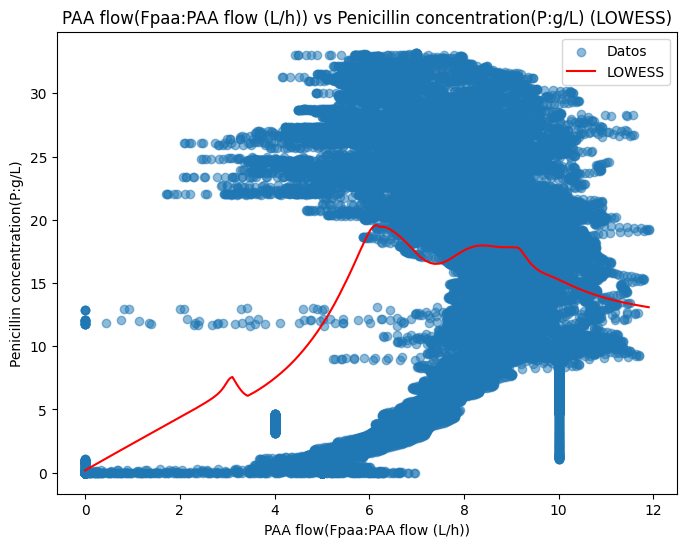

c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


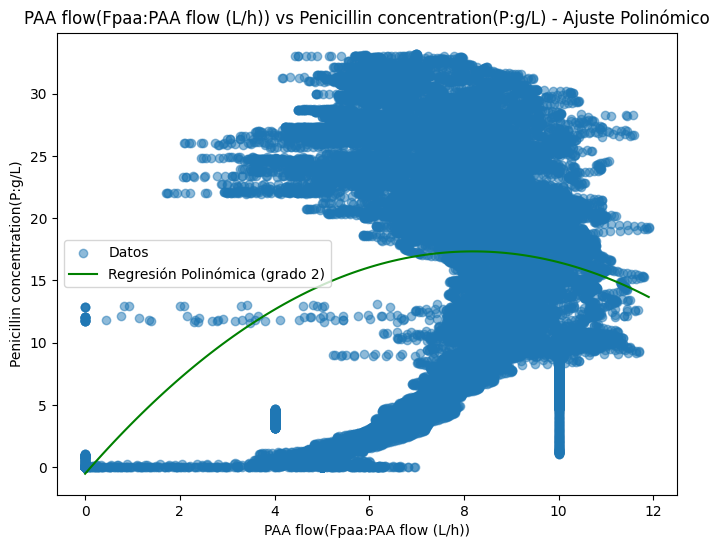

In [105]:
# =============================================================================
# 3. Visualización con LOWESS smoothing para capturar tendencias no lineales
# =============================================================================
plt.figure(figsize=(8,6))
x = df_biv[predictor]
y = df_biv[target_variable]
# LOWESS smoothing (frac controla el grado de suavizado)
lowess_smoothed = lowess(y, x, frac=0.3)
plt.scatter(x, y, alpha=0.5, label="Datos")
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label="LOWESS")
plt.title(f"{predictor} vs {target_variable} (LOWESS)")
plt.xlabel(predictor)
plt.ylabel(target_variable)
plt.legend()
plt.show()


# =============================================================================
# 4. Ajuste de regresión polinómica (grado 2) para evaluar la relación no lineal
# =============================================================================
X_poly = df_biv[[predictor]]
y_poly = df_biv[target_variable]
 
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)
model_poly = LinearRegression().fit(X_poly_transformed, y_poly)
 
# Generar rango de valores para graficar la curva ajustada
x_range = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
x_range_transformed = poly.transform(x_range)
y_poly_pred = model_poly.predict(x_range_transformed)
 
plt.figure(figsize=(8,6))
plt.scatter(X_poly, y_poly, alpha=0.5, label="Datos")
plt.plot(x_range, y_poly_pred, color='green', label="Regresión Polinómica (grado 2)")
plt.title(f"{predictor} vs {target_variable} - Ajuste Polinómico")
plt.xlabel(predictor)
plt.ylabel(target_variable)
plt.legend()
plt.show()

### Boxplot

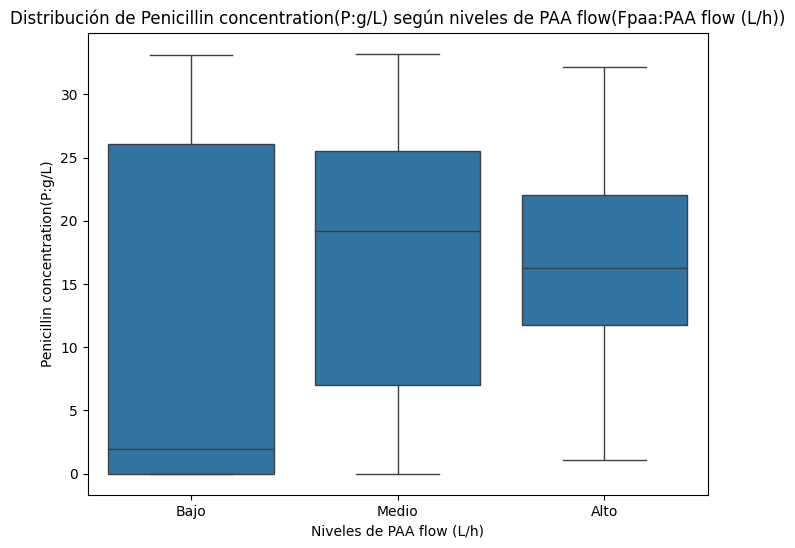

C:\Users\mavel\AppData\Local\Temp\ipykernel_25612\4054144437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='PAA_flow_bin', y=target_variable, data=df_biv, palette="coolwarm")


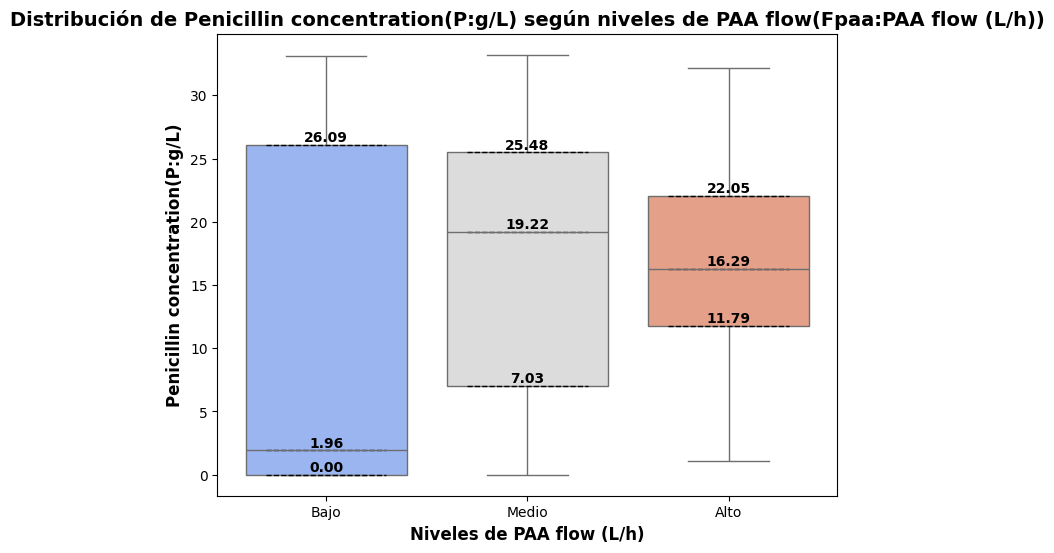

In [106]:
# =============================================================================
# 5. Boxplot comparativo: Analizar el impacto del flujo de PAA en la producción
# ------------------------------------------------------------------------------
# Se crea una variable categórica dividiendo PAA flow en terciles
df_biv['PAA_flow_bin'] = pd.qcut(df_biv[predictor], q=3, labels=["Bajo", "Medio", "Alto"])
 
plt.figure(figsize=(8,6))
sns.boxplot(x='PAA_flow_bin', y=target_variable, data=df_biv)
plt.title(f"Distribución de {target_variable} según niveles de {predictor}")
plt.xlabel("Niveles de PAA flow (L/h)")
plt.ylabel(target_variable)
plt.show()

# Crear la variable categórica dividiendo PAA flow en terciles
df_biv['PAA_flow_bin'] = pd.qcut(df_biv[predictor], q=3, labels=["Bajo", "Medio", "Alto"])

# Crear el boxplot
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='PAA_flow_bin', y=target_variable, data=df_biv, palette="coolwarm")

# Calcular los cuartiles y agregarlos al gráfico
for i, level in enumerate(["Bajo", "Medio", "Alto"]):
    quartiles = df_biv[df_biv['PAA_flow_bin'] == level][target_variable].quantile([0.25, 0.5, 0.75])
    
    # Marcar los cuartiles en la gráfica
    for q in quartiles:
        plt.hlines(y=q, xmin=i-0.3, xmax=i+0.3, colors='black', linestyles='dashed', linewidth=1)
        plt.text(i, q, f'{q:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Etiquetas y título
plt.title(f"Distribución de {target_variable} según niveles de {predictor}", fontsize=14, weight='bold')
plt.xlabel("Niveles de PAA flow (L/h)", fontsize=12, weight='bold')
plt.ylabel(target_variable, fontsize=12, weight='bold')

# Mostrar la gráfica
plt.show()



### Distribución individual para cada variable

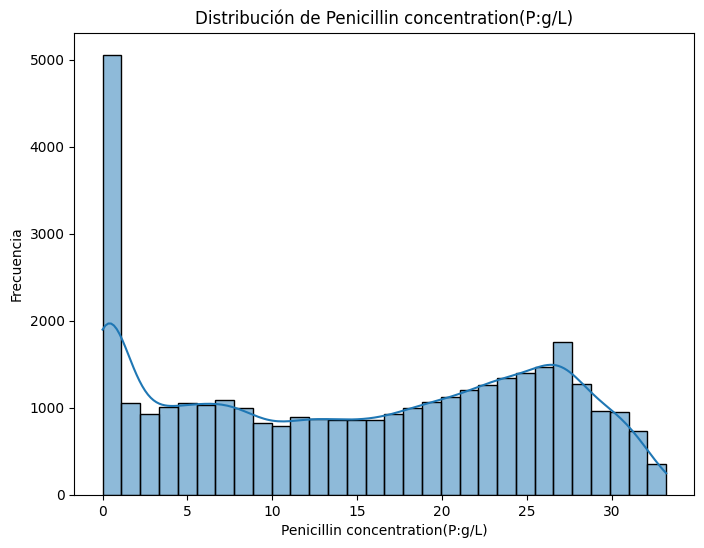

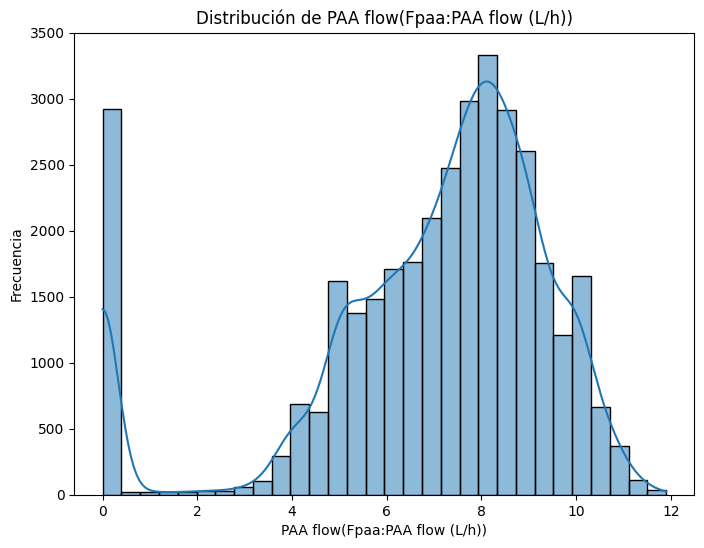

In [107]:

# =============================================================================
# 6. Histogramas individuales para cada variable
# =============================================================================
plt.figure(figsize=(8,6))
sns.histplot(df_biv[target_variable], bins=30, kde=True)
plt.title(f"Distribución de {target_variable}")
plt.xlabel(target_variable)
plt.ylabel("Frecuencia")
plt.show()
 
plt.figure(figsize=(8,6))
sns.histplot(df_biv[predictor], bins=30, kde=True)
plt.title(f"Distribución de {predictor}")
plt.xlabel(predictor)
plt.ylabel("Frecuencia")
plt.show()

La **distribución de la concentración de penicilina (P:g/L)** en el conjunto de datos. Aquí hay algunos puntos clave de interpretación:

**1. Distribución bimodal y valores en 0**
- Se observa una alta frecuencia en valores cercanos a **0 g/L**, lo que sugiere que hay muchas muestras donde la penicilina está casi ausente.
- Después del pico inicial en 0, la distribución parece tener un patrón **bimodal**, con dos regiones donde la frecuencia de valores es mayor.

 **2. Segunda concentración alta alrededor de 25 g/L**
- A partir de aproximadamente **15 g/L**, la concentración de penicilina empieza a aumentar en frecuencia.
- Hay un segundo pico entre **25 y 30 g/L**, lo que indica que muchas muestras tienen concentraciones en este rango.
 **3. Dispersión y asimetría**
- La concentración de penicilina está bastante dispersa, abarcando un rango de **0 a 33.21 g/L**.
- La presencia de un **pico en valores bajos y otro en valores más altos** sugiere que la producción de penicilina no sigue una distribución normal, sino que puede estar influenciada por factores externos (por ejemplo, condiciones del proceso de producción).

 **4. Posibles interpretaciones**
- **Los dos grupos de datos** podrían corresponder a diferentes **fases del proceso de producción**, donde en ciertos momentos hay **baja concentración** y en otros, **alta concentración**.
- También podría indicar **dos subgrupos en el proceso de fabricación** (por ejemplo, diferentes lotes o condiciones de fermentación).

 **Conclusión**:  
- Existe una gran cantidad de valores cercanos a **0 g/L**, lo que podría indicar muestras sin producción efectiva de penicilina.  
- La distribución es **bimodal**, con una segunda concentración alta en el rango de **25-30 g/L**.  
- Se recomienda investigar si existen **factores que expliquen esta distribución**, como **cambios en el proceso de producción o condiciones operativas**.

-----
La **distribución del flujo de PAA (PAA flow en L/h)** en el conjunto de datos. Aquí están las principales observaciones:

 **1. Alta frecuencia en valores cercanos a 0 L/h**
- Se observa un **pico muy alto en 0 L/h**, lo que indica que hay muchas muestras donde el flujo de PAA fue **nulo**.  
- Esto sugiere que en ciertos momentos o condiciones del proceso **no se dosificó PAA** o hubo interrupciones en su flujo.

 **2. Distribución unimodal con asimetría leve**
- Aparte del pico en **0 L/h**, la distribución general tiene una forma **cercana a la normal**, con una moda en torno a **8 L/h**.
- Se observa una **leve asimetría negativa** (hacia la izquierda), lo que indica que hay más valores altos de flujo que bajos.
- El flujo de PAA está concentrado mayormente entre **5 y 10 L/h**.
**3. Posibles interpretaciones**
- La existencia de dos picos sugiere que el **flujo de PAA no es constante** y podría estar **activándose y desactivándose en ciertos momentos**.
- **Podría haber fases en el proceso**: 
  - Fase sin flujo (0 L/h).
  - Fase activa con flujo estable (5-10 L/h).
- **Variabilidad del flujo**: Aunque hay un rango de valores entre 0 y 12 L/h, la mayoría de las muestras se agrupan entre **6 y 9 L/h**.

 **4. Relación con la Penicilina**
Dado que antes observamos una **correlación moderada entre la Penicillin concentration y el PAA flow**, este comportamiento bimodal podría indicar que la producción de penicilina también depende de cuándo y cuánto PAA se aplica.

---

 **Conclusión:**
- **Alta frecuencia en 0 L/h**, lo que sugiere momentos sin flujo de PAA.
- **Distribución unimodal con un pico principal alrededor de 8 L/h**, indicando que este es el rango de flujo más común.
- **Podría reflejar diferentes estados operativos en el proceso de producción**.



### Matriz de correlación y heatmap

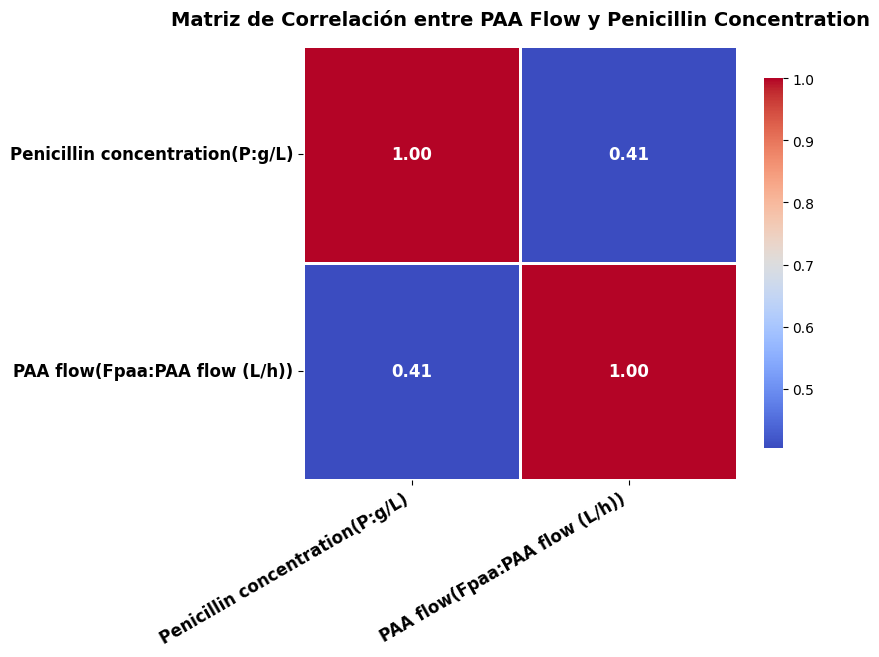

In [98]:
# =============================================================================
# 7. Matriz de correlación y heatmap
# =============================================================================
# Filtrar solo columnas numéricas
df_numeric = df_biv.select_dtypes(include=['number'])

# Crear matriz de correlación
correlation_matrix = df_numeric.corr(method='pearson')

# Ajustar la figura y el heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=1, 
    square=True, 
    cbar_kws={"shrink": 0.8}, 
    annot_kws={"size": 12, "weight": "bold"}
)

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=30, ha="right", fontsize=12, weight="bold")
plt.yticks(rotation=0, fontsize=12, weight="bold")

# Título más claro
plt.title("Matriz de Correlación entre PAA Flow y Penicillin Concentration", 
          fontsize=14, weight="bold", pad=15)

# Mostrar el gráfico
plt.show()




 **Interpretación de la Matriz de Correlación entre PAA Flow y Penicillin Concentration**

Esta imagen muestra una **matriz de correlación** entre dos variables:  
1. **Penicillin concentration (P:g/L)** → Concentración de penicilina  
2. **PAA flow (Fpaa: PAA flow (L/h))** → Flujo de ácido peracético  

La **correlación de Pearson** entre ambas variables es **0.41**. Vamos a desglosarlo:

 **1. Significado de los valores en la matriz**  
- **1.00** en la diagonal: Indica que cada variable tiene una correlación perfecta consigo misma.  
- **0.41** entre "Penicillin concentration" y "PAA flow": Indica una **correlación positiva moderada**.

 **2. Interpretación del valor de correlación (0.41)**  
- **Positivo** → Cuando el flujo de PAA aumenta, la concentración de penicilina tiende a aumentar.  
- **Moderado (0.41)** → La relación no es muy fuerte, lo que significa que aunque el flujo de PAA influye en la concentración de penicilina, **otros factores también afectan la producción**.  
- No es una correlación cercana a **1.0**, por lo que el flujo de PAA no es el único determinante en la concentración de penicilina.

 **3. Interpretación de los colores en la matriz**  
- **Rojo oscuro (1.00)** en la diagonal → Indica correlación perfecta consigo misma.  
- **Azul oscuro (0.41)** en la correlación entre las dos variables → Indica una relación positiva, pero no muy fuerte.  

El color azul sugiere que la correlación no es extremadamente alta, pero sí existe cierta relación entre ambas variables.

 **Conclusión**  
- Existe una **relación positiva moderada** entre el flujo de PAA y la concentración de penicilina (0.41).  
- Un **mayor flujo de PAA tiende a aumentar la concentración de penicilina**, pero no de manera determinante.  
- Se recomienda explorar **otras variables** que puedan estar influyendo en la concentración de penicilina, como la temperatura, el pH o la presencia de otros compuestos.  



## Análisis del lote con mayor concentración de penicilina

--- Análisis del Lote ---
 Estadísticas Descriptivas del Lote:


,count,mean,std,min,25%,50%,75%,max
Time (h),1450.0,145.100000,83.744652,0.200000,72.650000,145.100000,217.550000,290.00000
Aeration rate(Fg:L/h),1450.0,64.634483,10.402403,30.000000,60.000000,65.000000,75.000000,75.00000
Agitator RPM(RPM:RPM),1450.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),1450.0,77.293103,21.193844,8.000000,80.000000,80.000000,90.000000,150.00000
Acid flow rate(Fa:L/h),1450.0,0.008239,0.099012,0.000000,0.000000,0.000000,0.000000,2.07920
Base flow rate(Fb:L/h),1450.0,47.760901,24.470514,0.000000,37.301250,45.509000,55.909250,225.00000
Heating/cooling water flow rate(Fc:L/h),1450.0,86.049191,119.428583,0.000100,15.314750,37.425500,96.648500,674.12000
Heating water flow rate(Fh:L/h),1450.0,21.358063,45.536185,0.000100,0.000100,0.995770,12.808750,461.82000
Water for injection/dilution(Fw:L/h),1450.0,148.275862,146.551549,0.000000,0.000000,100.000000,250.000000,500.00000
Air head pressure(pressure:bar),1450.0,0.935379,0.120486,0.600000,0.900000,0.900000,1.000000,1.10000


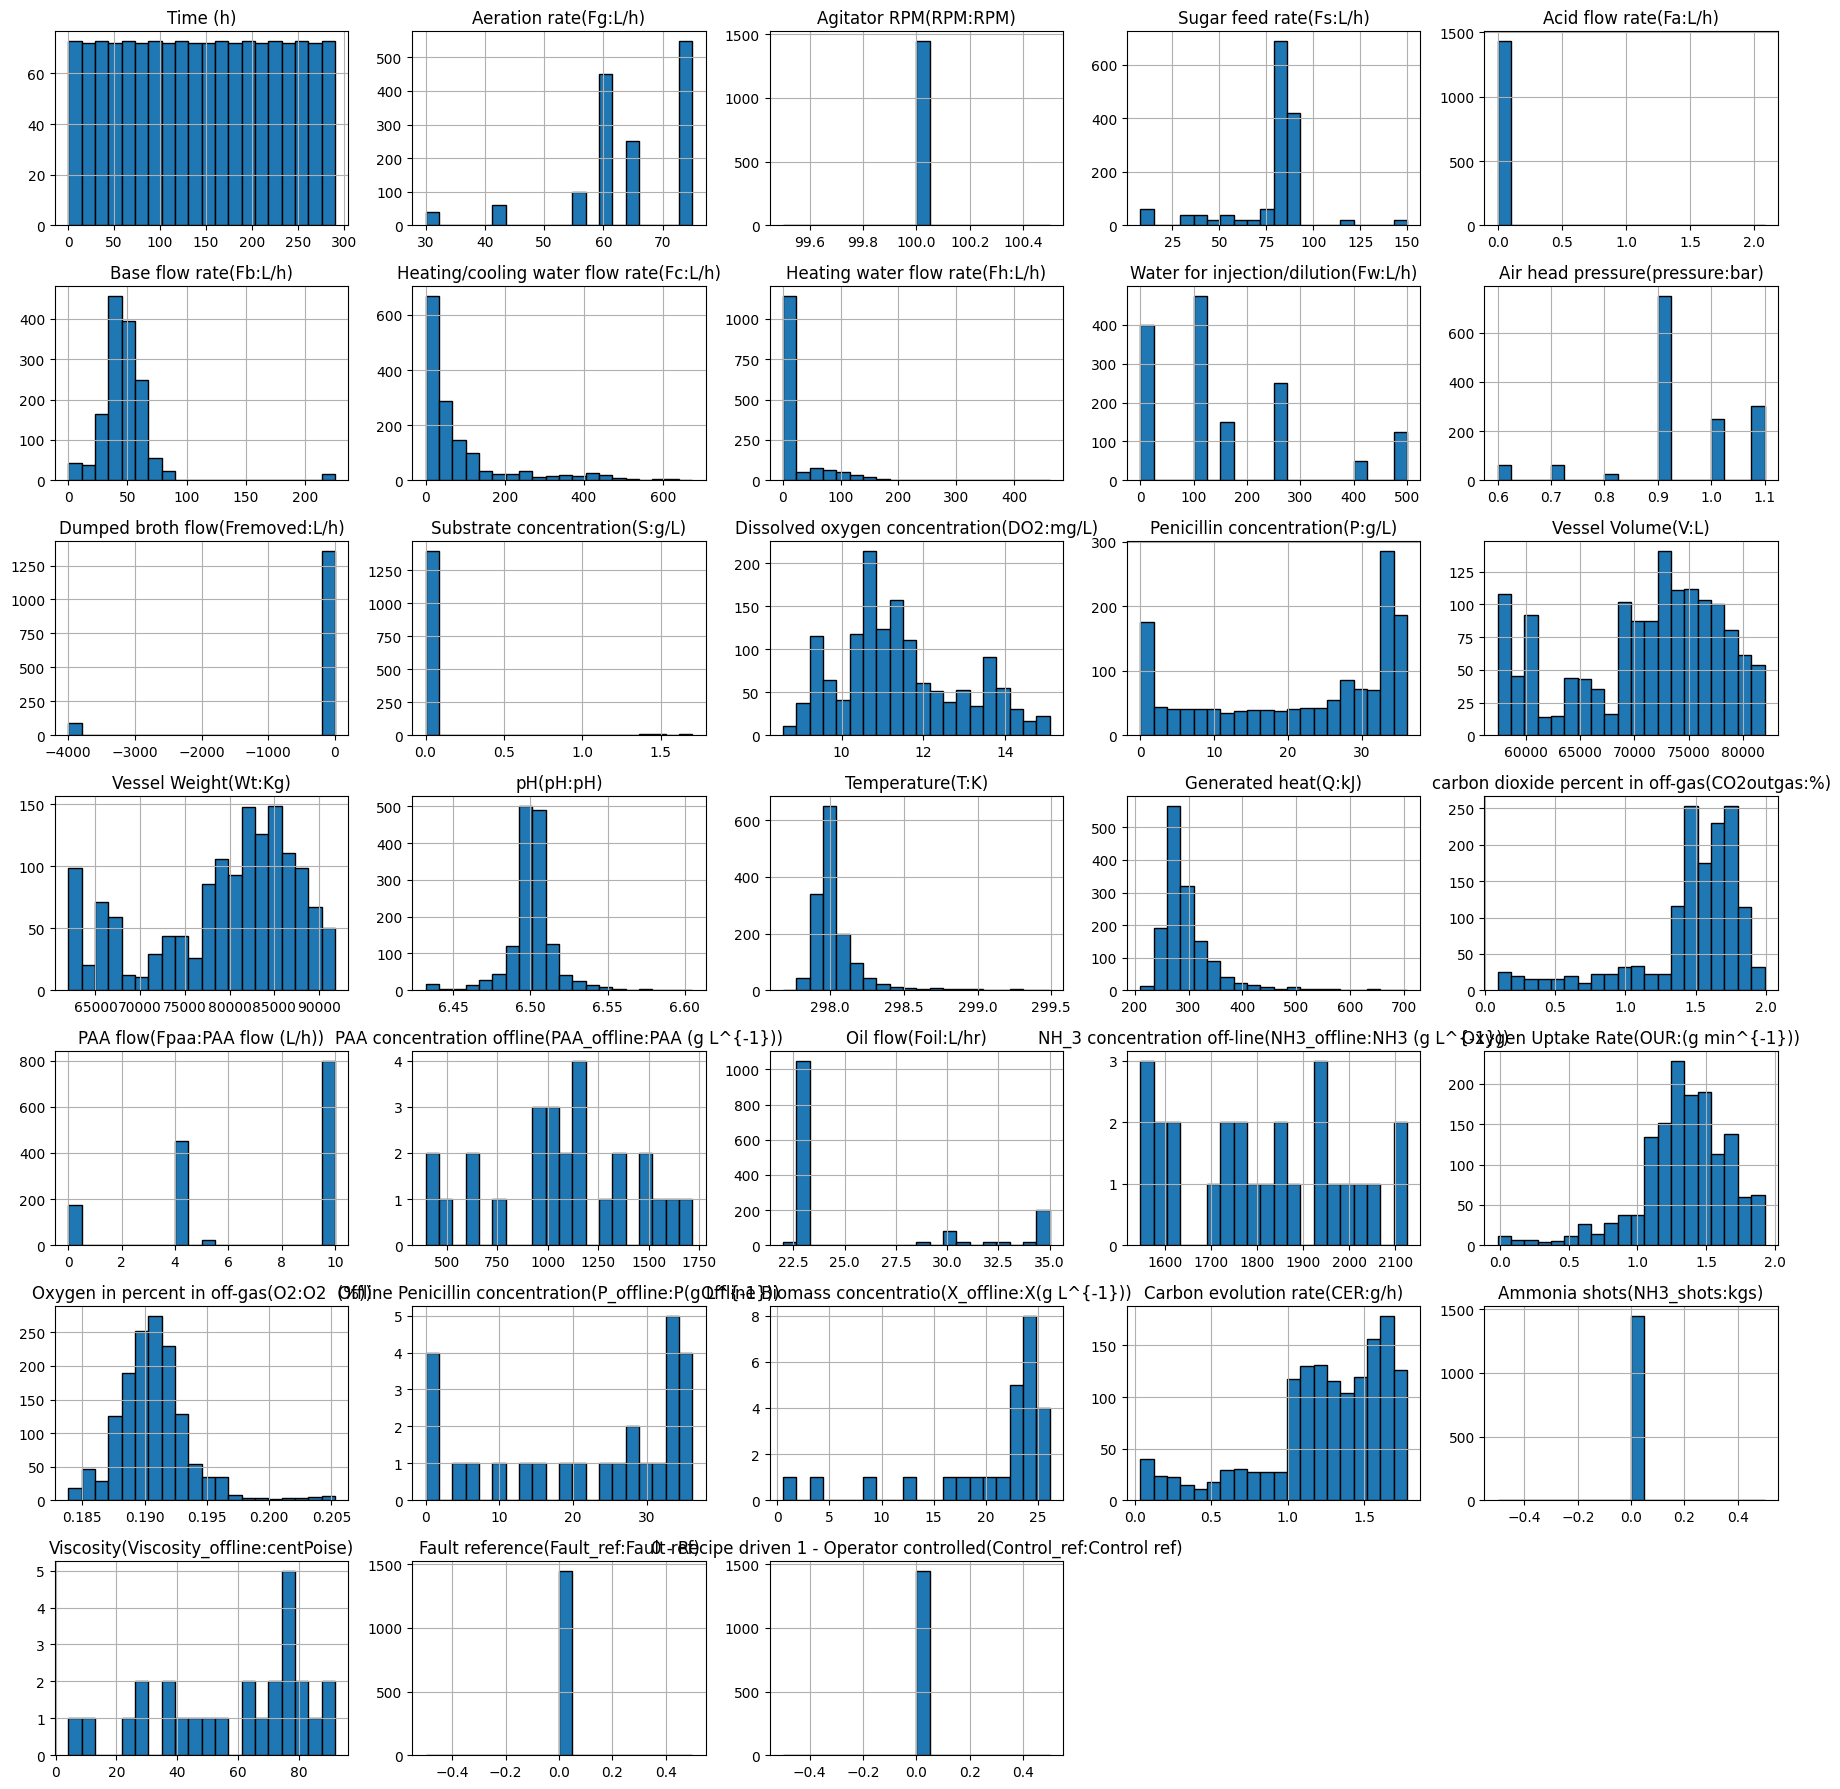

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_batch(df, start_index, end_index, num_rows=7, num_cols=5):
    """
    Extrae los datos de un lote específico, muestra estadísticas, matriz de correlación
    y gráficos de histogramas de todas sus variables.

    Args:
        df (pd.DataFrame): DataFrame principal con los datos de los lotes.
        start_index (int): Índice de inicio del lote.
        end_index (int): Índice de fin del lote.
        num_rows (int): Número de filas para la cuadrícula de histogramas (default 7).
        num_cols (int): Número de columnas para la cuadrícula de histogramas (default 5).
    """
    # Extraer datos del lote
    batch_df = df.loc[start_index:end_index]

    print("--- Análisis del Lote ---")
    # Mostrar estadísticas descriptivas
    print(" Estadísticas Descriptivas del Lote:")
    display(batch_df.describe().T)


    #  Histogramas de todas las variables en el lote
    num_vars = len(batch_df.columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Aplanar el array de subgráficos
    axes = axes.ravel()

    # Crear histogramas de cada variable
    for i, var in enumerate(batch_df.columns):
        ax = axes[i]
        ax.hist(batch_df[var], bins=20, edgecolor='k')
        ax.set_title(var)
        ax.grid(True)

    # Eliminar subgráficos vacíos
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    return batch_df

# 🔹 Extraer, analizar y visualizar el Lote 29 (ajustar índices según dataset)
batch_29_df = analyze_batch(df, start_index=31725, end_index=33174)


Aquí tienes la traducción al español:

---

<span style="color:blue">**Observación**</span>

Basado en las distribuciones de las variables en los datos, aquí hay algunas observaciones e ideas:

- **Tiempo (h):** El tiempo promedio es aproximadamente 145 horas, con una desviación estándar de alrededor de 83.74 horas. El tiempo mínimo es de 0.2 horas y el máximo de 290 horas. La mediana del tiempo también es de 145.1 horas, lo que indica una distribución simétrica.

- **Tasa de aireación (Fg:L/h):** La tasa de aireación promedio es de aproximadamente 64.63 L/h con una desviación estándar de 10.4 L/h. Los valores mínimo y máximo de aireación son 30 L/h y 75 L/h respectivamente. La mediana de la tasa de aireación es de 65 L/h.

- **RPM del agitador (RPM:RPM):** La velocidad del agitador se mantiene constante en 100 RPM durante toda la producción por lotes.

- **Tasa de alimentación de azúcar (Fs:L/h):** Las tasas de alimentación de azúcar presentan una distribución normal, con una media de 77.29 L/h y una desviación estándar de 21.19 L/h, lo que indica cierta variabilidad en la alimentación de azúcar.

- **Tasa de flujo de ácido (Fa:L/h):** La tasa de flujo de ácido está altamente sesgada hacia la derecha, con una media de 0.0082 L/h y una desviación estándar de 0.0990 L/h. Esto sugiere que la mayor parte del tiempo la tasa de flujo de ácido es muy baja, pero hay valores atípicos ocasionales altos.

- **Tasa de flujo de base (Fb:L/h):** Las tasas de flujo de base siguen una distribución normal, con una media de 47.76 L/h y una desviación estándar de 24.47 L/h, lo que indica una variabilidad moderada.

- **Tasa de flujo de agua de calentamiento/enfriamiento (Fc:L/h):** La tasa de flujo de agua de calentamiento/enfriamiento está sesgada hacia la derecha, con una media de 86.04 L/h y una desviación estándar de 119.43 L/h, lo que sugiere tasas de flujo ocasionalmente altas.

- **Tasa de flujo de agua de calentamiento (Fh:L/h):** Las tasas de flujo de agua de calentamiento también muestran una asimetría hacia la derecha, con una media de 21.36 L/h y una desviación estándar de 45.54 L/h, lo que indica valores ocasionalmente altos.

- **Agua para inyección/dilución (Fw:L/h):** La tasa de flujo de agua para inyección/dilución está sesgada hacia la derecha, con una media de 148.28 L/h y una desviación estándar de 146.55 L/h, lo que sugiere tasas de flujo ocasionalmente altas.

- **Presión de aire en cabeza (presión:bar):** La presión de aire en cabeza varía entre 0.6 y 1.1 bar, con un promedio de aproximadamente 0.94 bar.

- **Flujo de caldo eliminado (Fremoved:L/h):** El flujo de caldo eliminado está sesgado hacia la izquierda, con una media de -248.28 L/h y una desviación estándar de 965.46 L/h. Esto indica que la mayor parte del tiempo el flujo es cero, pero hay valores negativos ocasionales.

- **Concentración de sustrato (S:g/L):** Las concentraciones de sustrato están sesgadas hacia la derecha, con una media de 0.049 g/L y una desviación estándar de 0.253 g/L, lo que sugiere concentraciones ocasionalmente altas.

- **Concentración de oxígeno disuelto (DO2:mg/L):** Las concentraciones de oxígeno disuelto siguen una distribución normal, con una media de 11.42 mg/L y una desviación estándar de 1.49 mg/L, lo que indica niveles de oxígeno relativamente constantes.

- **Concentración de penicilina (P:g/L):** Las concentraciones de penicilina varían ampliamente, desde 0.0009 g/L hasta 36.183 g/L, con un promedio de aproximadamente 21.84 g/L.

- **Volumen del recipiente (V:L):** El volumen del recipiente sigue una distribución normal, con una media de 70,940.77 L y una desviación estándar de 6,902.15 L, lo que indica niveles de volumen consistentes.

- **Peso del recipiente (Wt:Kg):** El peso del recipiente sigue una distribución normal, con una media de 79,315.91 kg y una desviación estándar de 8,191.75 kg, lo que sugiere valores de peso relativamente estables.

- **pH (pH:pH):** Los valores de pH siguen una distribución normal, con una media de 6.50 y una desviación estándar de 0.02, lo que indica que los niveles de pH son bastante consistentes.

- **Temperatura (T:K):** Los datos de temperatura siguen una distribución normal, con una media de 298.03 K y una desviación estándar de 0.18 K, lo que sugiere condiciones de temperatura relativamente estables.

- **Calor generado (Q:kJ):** El calor generado está sesgado hacia la derecha, con una media de 296.94 kJ y una desviación estándar de 53.53 kJ, lo que indica valores ocasionalmente altos.

- **Porcentaje de dióxido de carbono en los gases de escape (CO2outgas:%):** El porcentaje de dióxido de carbono en los gases de escape sigue una distribución normal, con una media de 1.46% y una desviación estándar de 0.40%, lo que indica niveles relativamente estables.

- **Flujo de PAA (Fpaa:L/h):** El flujo de PAA tiene una media de 6.84 L/h y una desviación estándar de 3.70 L/h, lo que indica tasas de flujo consistentes.

- **Concentración de PAA fuera de línea (PAA_offline:g/L):** La concentración de PAA fuera de línea tiene una media de 1080.52 g/L y una desviación estándar de 360.31 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Flujo de aceite (Foil:L/h):** El flujo de aceite tiene una media de 25.63 L/h y una desviación estándar de 4.60 L/h, lo que indica tasas de flujo relativamente estables.

- **Concentración de NH_3 fuera de línea (NH3_offline:g/L):** La concentración de NH_3 fuera de línea tiene una media de 1808.82 g/L y una desviación estándar de 177.11 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Tasa de consumo de oxígeno (OUR:g/min):** Las tasas de consumo de oxígeno siguen una distribución normal, con una media de 1.34 g/min y una desviación estándar de 0.33 g/min, lo que indica un consumo de oxígeno constante.

- **Porcentaje de oxígeno en los gases de escape (O2:%):** Los porcentajes de oxígeno en los gases de escape siguen una distribución normal, con una media de 0.19% y una desviación estándar de 0.003%, lo que indica niveles de oxígeno relativamente estables.

- **Concentración de penicilina fuera de línea (P_offline:g/L):** La concentración de penicilina fuera de línea tiene una media de 22.05 g/L y una desviación estándar de 13.36 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Concentración de biomasa fuera de línea (X_offline:g/L):** La concentración de biomasa fuera de línea tiene una media de 20.54 g/L y una desviación estándar de 6.84 g/L, lo que indica niveles consistentes.

- **Tasa de evolución de carbono (CER:g/h):** Las tasas de evolución de carbono tienen una media de 1.25 g/h y una desviación estándar de 0.42 g/h, lo que sugiere una evolución de carbono constante.

- **Dosis de amoníaco (NH3_shots:kg):** Las dosis de amoníaco son constantes, con una media y desviación estándar de 0, lo que indica que no hay variación.

- **Viscosidad fuera de línea (Viscosity_offline:centipoise):** La viscosidad está sesgada hacia la izquierda, con una media de 57.80 centipoise y una desviación estándar de 25.36 centipoise, lo que sugiere valores de viscosidad ocasionalmente altos.

- **Referencia de fallas (Fault_ref):** La referencia de fallas es constante, con una media y desviación estándar de 0, lo que indica que no hay variación.

- **0 - Basado en receta, 1 - Controlado por operador (Control_ref):** El valor de la variable es 0, lo que indica que este lote está basado en una receta.

### Matriz de correlación

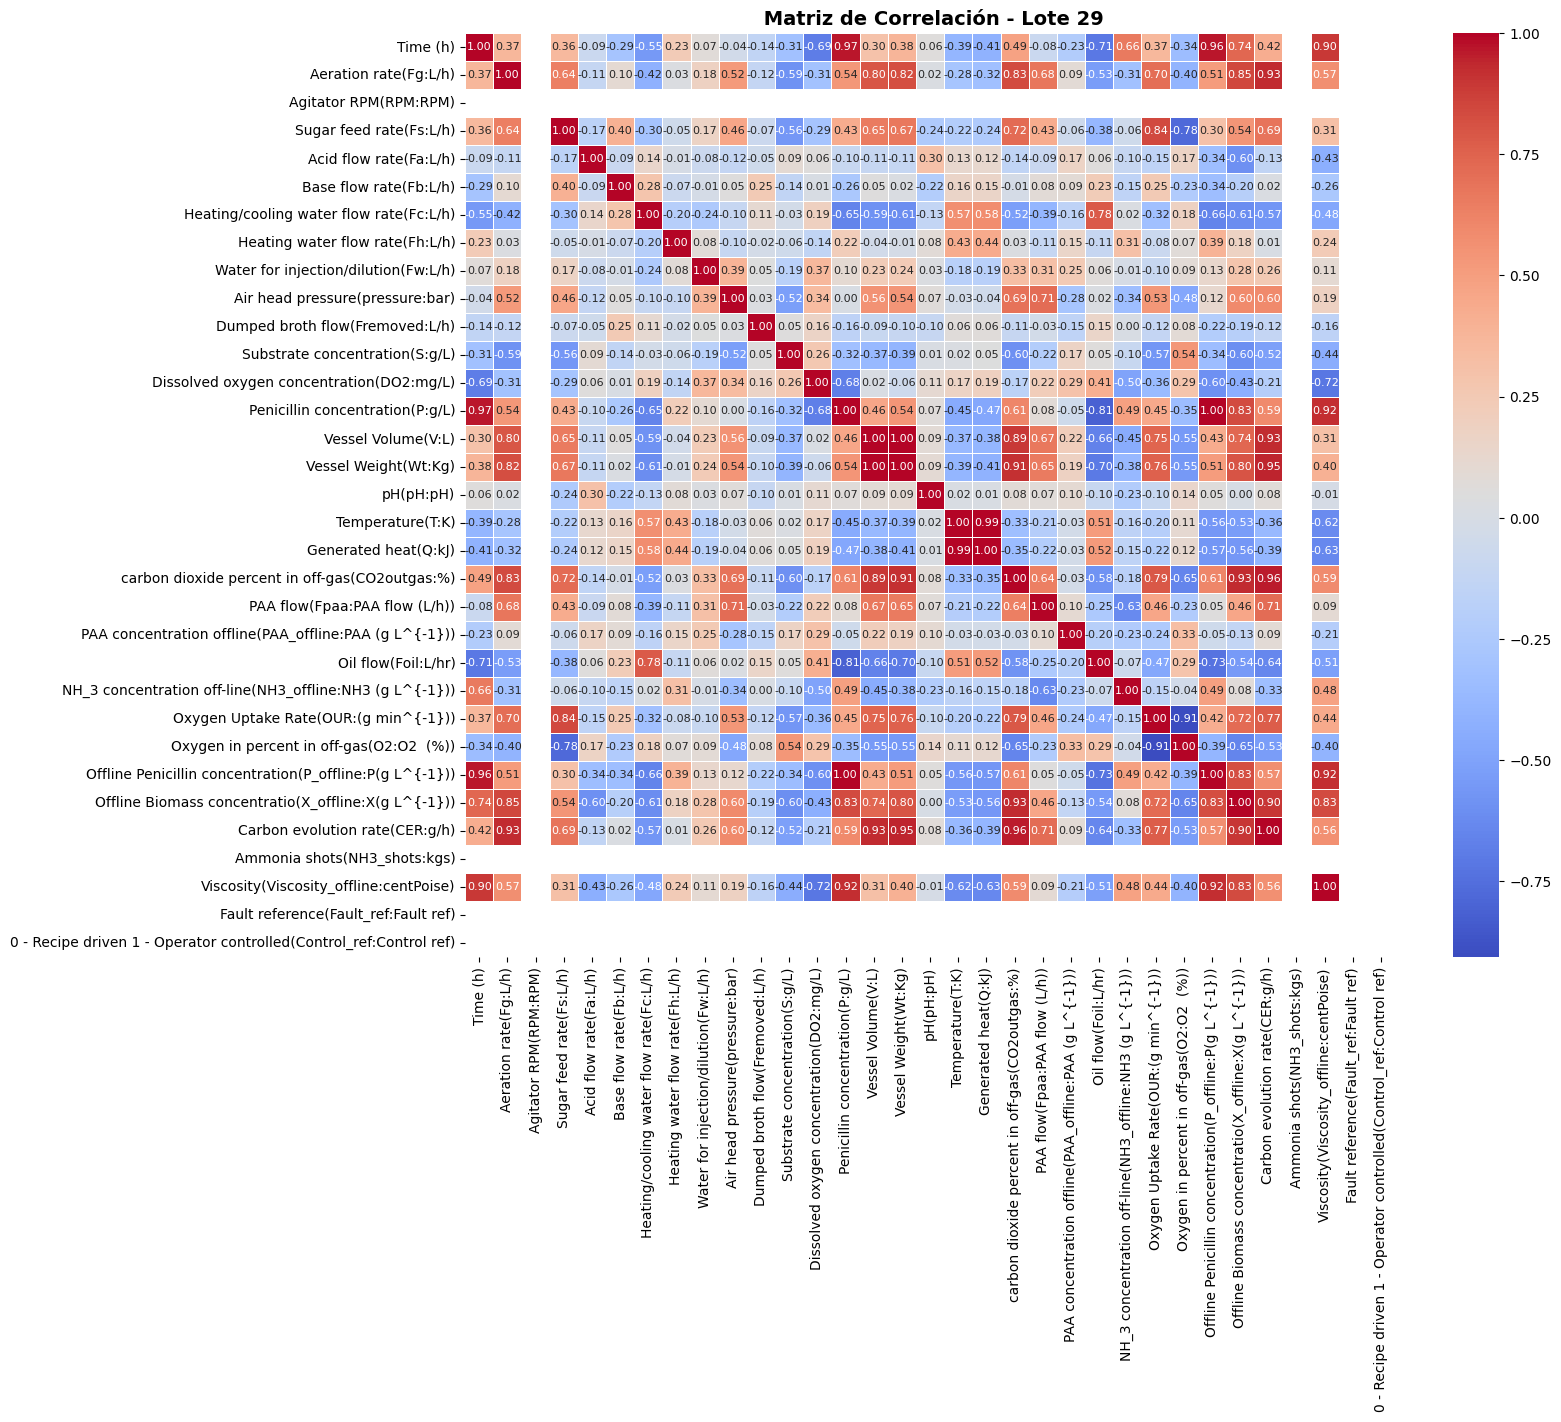

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# calcular la matriz de correlación
correlation_matrix = batch_29_df.corr()

# Configurar una figura más grande y mejorar la visualización
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

# Ajustar las etiquetas para mejor visualización
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Agregar título
plt.title(" Matriz de Correlación - Lote 29", fontsize=14, fontweight="bold")

# Mostrar el gráfico
plt.show()


In [44]:
import pandas as pd

def get_highest_correlations(df, threshold=0.7):
    """
    Encuentra las correlaciones más altas en el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        threshold (float): Valor mínimo de correlación a considerar (default 0.7).

    Returns:
        pd.DataFrame: DataFrame ordenado con las correlaciones más altas.
    """
    try:
        # Validar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError(" El DataFrame está vacío.")

        # Calcular la matriz de correlación
        corr_matrix = df.corr()

        # Validar que la matriz de correlación no esté vacía (sin datos numéricos)
        if corr_matrix.isnull().all().all():
            raise ValueError(" La matriz de correlación no contiene valores válidos.")

        # Convertir la matriz en una lista de pares de variables
        corr_pairs = corr_matrix.unstack()

        # Filtrar correlaciones redundantes (duplicadas y consigo mismo)
        corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

        # Ordenar por correlación absoluta (valor absoluto para ver positivas y negativas)
        sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

        # Filtrar por umbral de correlación
        high_corr = sorted_corr_pairs[sorted_corr_pairs >= threshold]

        # Si no hay correlaciones altas, lanzar una advertencia
        if high_corr.empty:
            print("⚠️ No se encontraron correlaciones por encima del umbral definido.")
            return pd.DataFrame(columns=["Variable 1", "Variable 2", "Correlación"])

        # Convertir en DataFrame para visualizar mejor
        high_corr_df = pd.DataFrame(high_corr).reset_index()
        high_corr_df.columns = ["Variable 1", "Variable 2", "Correlación"]

        return high_corr_df

    except Exception as e:
        print(f"⚠️ Error en la función: {e}")
        return pd.DataFrame(columns=["Variable 1", "Variable 2", "Correlación"])

# 🔹 Obtener las correlaciones más altas del Lote 29 (umbral 0.7)
high_correlations = get_highest_correlations(batch_29_df, threshold=0.7)

# Mostrar los pares de variables con mayor correlación
if not high_correlations.empty:
    print("\n Correlaciones más altas encontradas:")
    print(high_correlations.to_string(index=False))  # Mostrar sin índice
else:
    print(" No hay correlaciones significativas en el umbral definido.")



 Correlaciones más altas encontradas:
                                             Variable 1                                              Variable 2  Correlación
Offline Penicillin concentration(P_offline:P(g L^{-1}))                         Penicillin concentration(P:g/L)     0.999984
                        Penicillin concentration(P:g/L) Offline Penicillin concentration(P_offline:P(g L^{-1}))     0.999984
                                     Vessel Volume(V:L)                                    Vessel Weight(Wt:Kg)     0.995666
                                   Vessel Weight(Wt:Kg)                                      Vessel Volume(V:L)     0.995666
                                       Temperature(T:K)                                    Generated heat(Q:kJ)     0.994592
                                   Generated heat(Q:kJ)                                        Temperature(T:K)     0.994592
                        Penicillin concentration(P:g/L)                               

In [45]:


def get_highest_correlation_with_penicillin(df, target_col="Offline Penicillin concentration(P_offline:P(g L^{-1}))", threshold=0.7):
    """
    Encuentra las variables con mayor correlación con la concentración de penicilina offline.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        target_col (str): Nombre de la columna objetivo (Penicilina offline).
        threshold (float): Valor mínimo de correlación a considerar (default 0.7).

    Returns:
        pd.DataFrame: DataFrame ordenado con las correlaciones más altas con la variable objetivo.
    """
    try:
        # Validar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError(" El DataFrame está vacío.")

        # Validar que la columna de penicilina exista en el DataFrame
        if target_col not in df.columns:
            raise ValueError(f" La columna '{target_col}' no existe en el DataFrame.")

        # Calcular la matriz de correlación
        corr_matrix = df.corr()

        # Obtener las correlaciones con la columna objetivo
        target_corr = corr_matrix[target_col].drop(labels=[target_col])  # Excluir la autocorrelación

        # Ordenar por valor absoluto de correlación (mayores primero)
        sorted_target_corr = target_corr.abs().sort_values(ascending=False)

        # Filtrar por umbral de correlación
        high_corr = sorted_target_corr[sorted_target_corr >= threshold]

        # Si no hay correlaciones altas, lanzar una advertencia
        if high_corr.empty:
            print(f" No se encontraron variables con correlación ≥ {threshold} con {target_col}.")
            return pd.DataFrame(columns=["Variable", "Correlación"])

        # Convertir en DataFrame para visualizar mejor
        high_corr_df = pd.DataFrame(high_corr).reset_index()
        high_corr_df.columns = ["Variable", "Correlación"]

        return high_corr_df

    except Exception as e:
        print(f" Error en la función: {e}")
        return pd.DataFrame(columns=["Variable", "Correlación"])

# 🔹 Obtener las variables más correlacionadas con Penicilina Offline en Lote 29 (umbral 0.6)
high_correlations_penicillin = get_highest_correlation_with_penicillin(batch_29_df, threshold=0.6)

# Mostrar los resultados
if not high_correlations_penicillin.empty:
    print("\n Variables con mayor correlación con Penicilina Offline:")
    print(high_correlations_penicillin.to_string(index=False))  # Mostrar sin índice
else:
    print(" No se encontraron correlaciones significativas en el umbral definido.")



 Variables con mayor correlación con Penicilina Offline:
                                           Variable  Correlación
                    Penicillin concentration(P:g/L)     0.999984
                                           Time (h)     0.964879
             Viscosity(Viscosity_offline:centPoise)     0.921050
Offline Biomass concentratio(X_offline:X(g L^{-1}))     0.826505
                                Oil flow(Foil:L/hr)     0.730569
            Heating/cooling water flow rate(Fc:L/h)     0.658783
     carbon dioxide percent in off-gas(CO2outgas:%)     0.608835
           Dissolved oxygen concentration(DO2:mg/L)     0.600127
